<div align="center"><span style="font-family:arialblack;font-size:26px;color:green">Projet Final <br> Prédiction des clients eligible au credit bancaire <br> Criteres Importants pour le crédit </span></div><br><hr>

### 1-Intégration des Bibliotheques

In [1]:
# Intégration des bibliotheques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,mean_squared_error,r2_score,ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import xgboost as xgb
import statsmodels.api as sm

# Visualisation Arbres
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


### 2-Données & préparation

#### 2-1 chargement des données

In [2]:
data = pd.read_csv(r"C:\Users\rmama\Projet Final\Loan.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

#### 2-1 Renomage des noms de colonne

In [4]:
# Afin de faciliter l'analyse et une meilleure comprehension des colonnes du fichier, 
# nous renommons les entetes des colonnes en français.
data.rename(columns={
"ApplicationDate":"Date_demande",
"Age":"Age",
"AnnualIncome":"Revenu_annuel",
"CreditScore":"CreditScore",
"EmploymentStatus":"Statut_Emploi",
"EducationLevel":"Niveau_Education",
"Experience":"Experience",
"LoanAmount":"Montant_Pret",
"LoanDuration":"Duree_Pret",
"MaritalStatus":"Etat_civil",
"NumberOfDependents":"Nbre_Personnes_a_Charges",
"HomeOwnershipStatus":"Statut_proprietaire",
"MonthlyDebtPayments":"Paiements_mensuels_dettes",
"CreditCardUtilizationRate":"Taux_Utilisation_carte_de_credit",
"NumberOfOpenCreditLines":"Nombre_lignes_credit_actifs",
"NumberOfCreditInquiries":"Nombre_verifications_credits",
"DebtToIncomeRatio":"Ratio_Dette_Revenu",
"BankruptcyHistory":"Historique_Faillite",
"LoanPurpose":"Motif_Pret",
"PreviousLoanDefaults":"Precedent_Defauts_de_paiement",
"PaymentHistory":"Historique_comportement_paiement",
"LengthOfCreditHistory":"Duree_Historique_Credit",
"SavingsAccountBalance":"Solde_Compte_Epargne",
"CheckingAccountBalance":"Solde_Compte_Courant",
"TotalAssets":"Total_Actifs_Detenus",
"TotalLiabilities":"Total_Dettes-Dus",
"MonthlyIncome":"Revenu_Mensuel",
"UtilityBillsPaymentHistory":"Historique_paiement_charges",
"JobTenure":"Duree_Emploi_Actuel",
"NetWorth":"Valeur_nette",
"BaseInterestRate":"Taux_Interet_de_base",
"InterestRate":"Taux_interet_Obtenu",
"MonthlyLoanPayment":"Mensualite_a_payer_pret",
"TotalDebtToIncomeRatio":"Ratio_DettePret_Revenu",
"LoanApproved":"Pret_Approuve",
"RiskScore":"RiskScore"},
inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date_demande                      20000 non-null  object 
 1   Age                               20000 non-null  int64  
 2   Revenu_annuel                     20000 non-null  int64  
 3   CreditScore                       20000 non-null  int64  
 4   Statut_Emploi                     20000 non-null  object 
 5   Niveau_Education                  20000 non-null  object 
 6   Experience                        20000 non-null  int64  
 7   Montant_Pret                      20000 non-null  int64  
 8   Duree_Pret                        20000 non-null  int64  
 9   Etat_civil                        20000 non-null  object 
 10  Nbre_Personnes_a_Charges          20000 non-null  int64  
 11  Statut_proprietaire               20000 non-null  object 
 12  Paie

In [6]:
# Taille du dataset
print("Taille du dataset:", data.shape)

Taille du dataset: (20000, 36)


In [7]:
data.head()

,Date_demande,Age,Revenu_annuel,CreditScore,Statut_Emploi,Niveau_Education,Experience,Montant_Pret,Duree_Pret,Etat_civil,...,Revenu_Mensuel,Historique_paiement_charges,Duree_Emploi_Actuel,Valeur_nette,Taux_Interet_de_base,Taux_interet_Obtenu,Mensualite_a_payer_pret,Ratio_DettePret_Revenu,Pret_Approuve,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


**Commentaires**

* La dataframme contient **36 colonnes et 20 000 lignes**. Toutes les colonnes  sont non null.
* la colonne **"Date_demande"** représente Date de demande de prêt. C'est une valeur de type objet qui sera transformé en type date.
* la colonne **"Age"** représente Âge du candidat. Elle est de type entier.
* la colonne **"Revenu_annuel"** représente Revenu annuel.  Elle est de type entier.
* la colonne **"CreditScore"** représente Score de solvabilité.  Elle est de type entier.
* la colonne **"Statut_Emploi"** représente Situation professionnelle.  Elle est de type objet.
* la colonne **"Niveau_Education"** représente Niveau d’éducation supérieur atteint. Elle est de type objet.
* la colonne **"Experience"** représente Expérience professionnelle. Elle est de type entier.
* la colonne **"Montant_Pret"** représente Montant du prêt demandé. Elle est de type entier.
* la colonne **"Duree_Pret"** représente Période de remboursement du prêt. Elle est de type entier.
* la colonne **"Etat_civil"** représente État marital du demandeur.Elle est de type objet.
* la colonne **"Nbre_Personnes_a_Charges"** représente Nombre de dépendants. Elle est de type entier.
* la colonne **"Statut_proprietaire"** représente Type de propriété. Elle est de type objet.
* la colonne **"Paiements_mensuels_dettes"** représente Obligations de dettes mensuelles. Elle est de type entier.
* la colonne **"Taux_Utilisation_carte_de_credit"** représente pourcentage d’utilisation de la carte de crédit. Elle est de type Float .
* la colonne **"Nombre_lignes_credit_actifs"** représente Lignes de crédit actives. Elle est de type entier.
* la colonne **"Nombre_verifications_credits"** représente Les vérifications de crédit comptent. Elle est de type entier.
* la colonne **"Ratio_Dette_Revenu"** représente Proportion dette/revenu
* la colonne **"Historique_Faillite"** représente Dossiers de faillite. si valeur = 1 Il y a eu une faillite antérieur ; 0 = aucune. A transformer en valeur catégorielle.
* la colonne **"Motif_Pret"** représente Motif du prêt
* la colonne **"Precedent_Defauts_de_paiement"** représente Défauts de paiement antérieurs. si valeur = 1 Il y a eu un defaut de paiement antérieur ; 0 = aucun. A transformer en valeur catégorielle.
* la colonne **"Historique_comportement_paiement"** représente Comportement de paiement passé
* la colonne **"Duree_Historique_Credit"** représente Durée de l’historique de crédit
* la colonne **"Solde_Compte_Epargne"** représente montant du compte d’épargne
* la colonne **"Solde_Compte_Courant"** représente fonds du compte courant
* la colonne **"Total_Actifs_Detenus"** représente Total des actifs détenus
* la colonne **"Total_Dettes-Dus"** représente Total des dettes dus
* la colonne **"Revenu_Mensuel"** représente Revenu mensuel
* la colonne **"Historique_paiement_charges"** représente Dossier de paiement des services publics
* la colonne **"Duree_Emploi_Actuel"** représente Durée du poste
* la colonne **"Valeur_nette"** représente valeur financière totale
* la colonne **"Taux_Interet_de_base"** représente Taux d’intérêt de départ
* la colonne **"Taux_interet_Obtenu"** représente Taux d’intérêt appliqué
* la colonne **"Mensualite_a_payer_pret"** représente Paiement mensuel du prêt
* la colonne **"Ratio_DettePret_Revenu"** représente Dette totale par rapport aux revenus.
* la colonne **"Pret_Approuve"** liste le statut d'approbation du prêt : 1 = approuvé ; 0 = refusé. A transformer en valeur catégorielle.
* la colonne **"RiskScore"** représente le Score d’évaluation des risques. Elle est de type entier.


#### 2-3 Conversion de type de données & Nettoyage des données

In [8]:
# Selectionne un jeu de donnees avec la date <= a l'année 2026
# df = data[data['Date_demande']<'2026-01-01']
df = data

In [9]:
# Taille du Nouveau dataset avec le filtrage des années
print("Taille du dataset:", df.shape)
df.head()

Taille du dataset: (20000, 36)


,Date_demande,Age,Revenu_annuel,CreditScore,Statut_Emploi,Niveau_Education,Experience,Montant_Pret,Duree_Pret,Etat_civil,...,Revenu_Mensuel,Historique_paiement_charges,Duree_Emploi_Actuel,Valeur_nette,Taux_Interet_de_base,Taux_interet_Obtenu,Mensualite_a_payer_pret,Ratio_DettePret_Revenu,Pret_Approuve,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [10]:
# Transformation en type Date
df['Date_demande'] = pd.to_datetime(df['Date_demande'], errors='coerce', format='%Y-%m-%d')

# Transformation en type Category
df['Historique_Faillite'] = df['Historique_Faillite'].astype('category')
df['Precedent_Defauts_de_paiement'] = df['Precedent_Defauts_de_paiement'].astype('category')
df['Pret_Approuve'] = df['Pret_Approuve'].astype('category')

# Transformation de la colonne children en integer se fera lorsqu'on aura traité les 4 valeurs de nulles de cette colonne
# data['person_age'] = data['person_age'].astype('int')

In [11]:
# Vérification des modifications des types de données.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date_demande                      20000 non-null  datetime64[ns]
 1   Age                               20000 non-null  int64         
 2   Revenu_annuel                     20000 non-null  int64         
 3   CreditScore                       20000 non-null  int64         
 4   Statut_Emploi                     20000 non-null  object        
 5   Niveau_Education                  20000 non-null  object        
 6   Experience                        20000 non-null  int64         
 7   Montant_Pret                      20000 non-null  int64         
 8   Duree_Pret                        20000 non-null  int64         
 9   Etat_civil                        20000 non-null  object        
 10  Nbre_Personnes_a_Charges          20000 non-nu

- Gestion des doublons

In [12]:
 # Vérification si existance des doublons
df.duplicated().sum()

np.int64(0)

In [13]:
# Pas de doublons dans ces lignes

#### 2-4 Création de colonnes pour de nouvelle catégorisation

***2-4-1 . Création de la fonction 't_age' regroupe la population par tranche d'ages .***

In [14]:
# creation de la fonction
def t_age(vage):
    if vage < 18: return "Enfants"
    if vage < 36: return"Jeunes Adultes"
    if vage < 61: return"Adultes"
    else:  return "Seniors"

In [15]:
# application de la fonction t_age et ajout d'une nouvelle colonne 'Tranche d'age'.
df["Tranche_age"] = df['Age'].map(t_age)

***2-4-2 . Création de la fonction 't_creditscore' regroupe la population par tranche de la note du creditscore .***

In [16]:
# creation de la fonction
def t_creditscore(vcredit):
    if vcredit < 560: return "Faible"
    if vcredit  < 660: return "Passable"
    if vcredit  < 725: return "Bon"
    if vcredit  < 760: return "Très bon"
    else: return "Excellent"

In [17]:
# application de la fonction t_creditscore et ajout d'une nouvelle colonne 'Tranche_CreditScore'.
df["Tranche_CreditScore"] = df['CreditScore'].map(t_creditscore)

***2-4-3 . Création de la fonction 't_riskscore' regroupe la population par tranche de la note du RiskScore .***

In [18]:
# creation de la fonction
def t_riskscore(vrisk):
    if vrisk < 21: return "Tres Faible"
    if vrisk  < 41: return "Faible"
    if vrisk  < 61: return "Modere"
    if vrisk  < 81: return "Eleve"
    else : return "Haut"
  

In [19]:
# application de la fonction t_RiskScore et ajout d'une nouvelle colonne 'Tranche_RiskScore'.
df["Tranche_RiskScore"] = df['RiskScore'].map(t_riskscore)

***2-4-4 . Création de la colonne "Année".***

In [20]:
# Extraction de l'année
df["Annee"] = df['Date_demande'].dt.year
df["Tx_Ratio_DettePret_Revenu"] = df["Ratio_DettePret_Revenu"] * 100

***2-4-5 . Création de la fonction 't_experience' regroupe la population par tranche cumulée d'année d'experience travaillé .***

In [21]:
def t_experience(vexpe):
    if vexpe == 0: return "expe_0ans"
    if vexpe < 6: return "expe_1_5ans"
    if vexpe < 11: return "expe_6_10ans"
    if vexpe < 16: return "expe_11_15ans"
    else: return "expe_16p"

In [22]:
# application de la fonction t_experience et ajout d'une nouvelle colonne 'Tranche_experience'.
df["Tranche_experience"] = df['Experience'].map(t_experience)

***2-4-6 . Création de la fonction 't_anciennete' regroupe la population par tranche d'ancienneté dans le dernier poste .***

In [23]:
def t_anciennete(vancien):
    if vancien == 0: return "ancien_0"
    if vancien < 6: return "ancien_1_5"
    if vancien < 11: return "ancien_6_10"
    else: return "ancien_11p"

In [24]:
# application de la fonction t_anciennete et ajout d'une nouvelle colonne 'Tranche_anciennete'.
df["Tranche_anciennete"] = df['Duree_Emploi_Actuel'].map(t_experience)

***2-4-7 . Création de la fonction 't_revenu' regroupe la population par tranche de revenu annuel.***

In [25]:
def t_revenu(vreve):
    if vreve < 30000: return "R_15_30k"
    if vreve <= 60000: return "R_31_60k"
    else: return "R_60k+"

In [26]:
# application de la fonction t_revenu et ajout d'une nouvelle colonne 'Tranche_anciennete'.
df["Tranche_revenu_annuel"] = df['Revenu_annuel'].map(t_revenu)

***2-4-8 . Création de la fonction 't_cc' regroupe la population par tranche du Solde_Compte_Courant.***

In [27]:
def t_cc(vcc):
    if vcc < 3000: return "Cpte_CR_1_3K"
    if vcc <= 6000: return "Cpte_CR_3_6K"
    else: return "Cpte_CR_6K+"

In [28]:
# application de la fonction t_cc et ajout d'une nouvelle colonne 'Tranche_Solde_Compte_Courant'.
df["Tranche_Solde_Compte_Courant"] = df['Solde_Compte_Courant'].map(t_cc)

***2-4-9 . Création de la fonction 't_cep' regroupe la population par tranche du Solde_Compte_Epargne.***

In [29]:
def t_cep(vep):
     if vep < 10000: return "Cpte_EP_1_10K"
     if vep <= 20000: return "Cpte_EP_10_20K"
     else: return "Cpte_EP_20K+"

In [30]:
# application de la fonction t_cc et ajout d'une nouvelle colonne 'Tranche_Solde_Compte_Epargne'.
df["Tranche-Cpte_Ep"] = df['Solde_Compte_Epargne'].map(t_cep)

***2-4-10 . Création de la fonction 't_vnet' regroupe la population par tranche du Solde  de leur valeur nette (Actifs-dettes).***

In [31]:
def t_vnet(vatde):
    if vatde < 72000: return "Va-Ne-72K"
    if vatde <= 144000: return "Va-Ne-144K"
    else: return  "Va-Ne-145K+"

In [32]:
# application de la fonction t_vnet et ajout d'une nouvelle colonne 'Tranche_Valeur_nette'.
df["Tranche_Valeur_Nette"] = df['Valeur_nette'].map(t_vnet)

***2-4-11 . Création de la fonction 't_txendet' regroupe la population par tranche du taux d'endettement en y ajoutant le credit demandé.***

In [33]:
def t_txendet(vtx):
    if vtx  < 0.15: return "Rat_DR_15%"
    if vtx < 0.30: return "Rat_DR_30%"
    if vtx <= 0.45: return "Rat_DR_45%"
    else: return  "Rat_DR_45%+"

In [34]:
# application de la fonction t_txendet et ajout d'une nouvelle colonne 'Tranche_Dettes_Revenu'.
df["Tranche_Dettes_Revenu"] = df['Ratio_DettePret_Revenu'].map(t_txendet)


***2-4-12. Création de la colonne taux d'endettement 'Tx_Ratio_DettePret_Revenu'***

In [35]:
# Calcul du taux en pourcentage
df["Tx_Ratio_DettePret_Revenu"] = df["Ratio_DettePret_Revenu"] * 100

***2-4-13. Création de la fonction 't_dureec' regroupe la population par tranche sur la durée du credit demandée***

In [36]:
def t_dureec(vduree):
    if vduree <= 10: return "Duree_10"
    if vduree  <= 20: return "Duree_10_20"
    if vduree  <= 30: return "Duree_20_30"
    else: return "Duree_30+"

In [37]:
# application de la fonction t_dureec et ajout d'une nouvelle colonne 'Tranche_Duree_Totale_credit'.
df["Tranche_Duree_Totale_credit"] = df['Duree_Historique_Credit'].map(t_dureec)

***2-4-14. Affichage des nouvelles colonnes***

In [38]:
df.head()

,Date_demande,Age,Revenu_annuel,CreditScore,Statut_Emploi,Niveau_Education,Experience,Montant_Pret,Duree_Pret,Etat_civil,...,Annee,Tx_Ratio_DettePret_Revenu,Tranche_experience,Tranche_anciennete,Tranche_revenu_annuel,Tranche_Solde_Compte_Courant,Tranche-Cpte_Ep,Tranche_Valeur_Nette,Tranche_Dettes_Revenu,Tranche_Duree_Totale_credit
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,2018,18.107720,expe_16p,expe_11_15ans,R_31_60k,Cpte_CR_1_3K,Cpte_EP_1_10K,Va-Ne-144K,Rat_DR_30%,Duree_10
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,2018,38.985245,expe_11_15ans,expe_1_5ans,R_31_60k,Cpte_CR_3_6K,Cpte_EP_1_10K,Va-Ne-72K,Rat_DR_45%,Duree_10
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,2018,46.215697,expe_16p,expe_6_10ans,R_31_60k,Cpte_CR_1_3K,Cpte_EP_1_10K,Va-Ne-72K,Rat_DR_45%+,Duree_20_30
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,2018,31.309831,expe_16p,expe_1_5ans,R_60k+,Cpte_CR_1_3K,Cpte_EP_1_10K,Va-Ne-144K,Rat_DR_45%,Duree_10
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,2018,7.020985,expe_16p,expe_1_5ans,R_60k+,Cpte_CR_3_6K,Cpte_EP_1_10K,Va-Ne-145K+,Rat_DR_15%,Duree_20_30


### 3-Analyse exploratoire (EDA)

#### 3-1 Statistique descriptive des colonnes

##### 3-1-1 Statistique descriptive des colonnes numériques

In [39]:
df.describe().round(1).T

,count,mean,min,25%,50%,75%,max,std
Date_demande,20000,2045-05-18 12:00:00,2018-01-01 00:00:00,2031-09-09 18:00:00,2045-05-18 12:00:00,2059-01-25 06:00:00,2072-10-03 00:00:00,NaN
Age,20000.0,39.8,18.0,32.0,40.0,48.0,80.0,11.6
Revenu_annuel,20000.0,59161.5,15000.0,31679.0,48566.0,74391.0,485341.0,40350.8
CreditScore,20000.0,571.6,343.0,540.0,578.0,609.0,712.0,51.0
Experience,20000.0,17.5,0.0,9.0,17.0,25.0,61.0,11.3
Montant_Pret,20000.0,24882.9,3674.0,15575.0,21914.5,30835.0,184732.0,13427.4
Duree_Pret,20000.0,54.1,12.0,36.0,48.0,72.0,120.0,24.7
Nbre_Personnes_a_Charges,20000.0,1.5,0.0,0.0,1.0,2.0,5.0,1.4
Paiements_mensuels_dettes,20000.0,454.3,50.0,286.0,402.0,564.0,2919.0,240.5
Taux_Utilisation_carte_de_credit,20000.0,0.3,0.0,0.2,0.3,0.4,0.9,0.2


**Les statistiques descriptives nous permettent d'observer l'ordre de grandeur et la dispersion des variables :**  


| Variable | Interprétation rapide |
|:---|:---|
| **<span style="color: purple;">Date_demande</span>**  | Les dates vont de 2018 a 2072. Cela suppose que ces informations on été simulés. La question qui se pose est d'utiliser ou non cette colonne. Les valeurs sont bien etalés sur la periode.  |
| **<span style="color: purple;">Age</span>** | C'est l'age du demandeur'. La moyenne est a 39 ans et le max est à 80 ans. La valeur Max est à verifier. |
| **<span style="color: purple;">Revenu_annuel</span>** | Le revenu moyen est de 59161, on constate aussi que le revenu max de 485341 est plus de 5 fois superieur au 3e quartile. Cela peut etre une valeur extreme qui peut etre comme abérrante  |
| **<span style="color: purple;">CreditScore</span>** |Score de solvabilité. Score global de risque calculé par la Banque. La moyenne de cet échantillon est 571,6. le minimum est a 341 et le max est 712.plus il est elevé, plus vous avez une bonne probabilité d'avoir son credit. Des tranches seront defins plus bas |
| **<span style="color: purple;">Experience </span>**| Années d’expérience professionnelle. LA valeur Max de l'experience peut etre considéré comme une valeur extreme.|
| **<span style="color: purple;">Montant_Pret</span>** | Montant du pret demandé. La moyenne des prets est à 24882,9  |
| **<span style="color: purple;">Duree_Pret</span>** | La duree du pret demandée. Elle va de 12 mois a 120 mois.  |
| **<span style="color: purple;">Nbre_Personnes_a_Charges</span>** | Nombre de personnes a charges dans le foyer. la moyenne etant a 1,5 et le max à 5.  |
| **<span style="color: purple;">Paiements_mensuels_dettes</span>** |Paiements mensuels de dettes existantes.  |
| **<span style="color: purple;">Taux_Utilisation_carte_de_credit</span>** | Taux d'utilisation de la carte de crédit  |
| **<span style="color: purple;">Nombre_lignes_credit_actifs</span>** | Nombre de lignes de crédit actives (en cours).  |
| **<span style="color: purple;">Nombre_verifications_credits.</span>** |Nombre de vérifications de crédit récentes.  |
| **<span style="color: purple;">Ratio_Dette_Revenu</span>** |Proportion dette/revenu. Le ratio moyen est a 30% et le maximum a 90% |
| **<span style="color: purple;">Historique_comportement_paiement</span>** |Historique des paiements passés (ponctualité, retards…).  |
| **<span style="color: purple;">Duree_Historique_Credit</span>** |Durée totale de l’historique des crédits.  |
| **<span style="color: purple;">Duree_Emploi_Actuel</span>** |Durée dans l’emploi actuel.  |
| **<span style="color: purple;">Valeur_nette</span>** |Valeur nette = ((Valeur totale des actifs détenus) - (Montant total des dettes)).  |
| **<span style="color: purple;">Taux_Interet_de_base</span>** |Taux d’intérêt de base du marché.  |
| **<span style="color: purple;">Taux_interet_Obtenu</span>** |Taux d’intérêt appliqué au demandeur.  |
| **<span style="color: purple;">Mensualite_a_payer_pret</span>** |Mensualité à payer pour le prêt.  |
| **<span style="color: purple;">Ratio_DettePret_Revenu</span>** |Ratio total dettes / revenu en tenant compte du prêt demandé.  |
| **<span style="color: purple;">RiskScore</span>** |Score global de risque calculé par l’institution.  |
| **<span style="color: purple;">Annee</span>** |Année de la demande du pret.  |
| **<span style="color: purple;">Tx_Ratio_DettePret_Revenu</span>** |Ratio total dettes / revenu en tenant compte du prêt demandé.  |

**<span style="color: red;">Valeurs aberrantes</span>** :
* On constate des possibles valeurs abérrantes ou extremes dans certaines colonnes d'ou la necessité de confirmer cette analyse par les graphiques moustaches et la methode IQR

##### 3-1-2 Statistique descriptive des colonnes textes

In [40]:
data.describe(include='object').T

,count,unique,top,freq
Statut_Emploi,20000,3,Employed,17036
Niveau_Education,20000,5,Bachelor,6054
Etat_civil,20000,4,Married,10041
Statut_proprietaire,20000,4,Mortgage,7939
Motif_Pret,20000,5,Home,5925
Tranche_age,20000,3,Adultes,11852
Tranche_CreditScore,20000,3,Passable,12406
Tranche_RiskScore,20000,4,Modere,15280
Tranche_experience,20000,5,expe_16p,11018
Tranche_anciennete,20000,5,expe_1_5ans,12223


**Les statistiques descriptives nous permettent d'observer l'ordre de grandeur et la dispersion des variables :**  


| Variable | Interprétation rapide |
|:---|:---|
| **<span style="color: purple;">Statut_Emploi</span>**  | Concernant le statut employé il ya 3 catégories et la catégorie **employed** represente  17036 sur les 20000 presents dans la base soit 85,18% |
| **<span style="color: purple;">Niveau_Education</span>** | Il y a 5 catégories dans ce champs, dont le **Bachelor** represente 6054 sur 20000 soit 30,24%|
| **<span style="color: purple;">Etat_civil</span>** | Il y a 4 catégories dans ce champs, dont le **Married** represente 10041 sur 20000 soit 50,20%|
| **<span style="color: purple;">Statut_proprietaire</span>** | Il y a 4 catégories dans ce champs, dont le plus important est le **Mortgage** (maison est a credit) represente 7939 sur 20000 soit 39,79%|
| **<span style="color: purple;">Motif_Pret</span>** | Il y a 5 catégories dans ce champs, dont le plus important est le **Home** (maison) represente 5925 sur 20000 soit 29,63%|
| **<span style="color: purple;">Tranche_age</span>** | Regroupé en 3 catégories dans ce champs, dont le plus important est  **Adultes**  represente 11852 sur 20000 soit 59,26%|
| **<span style="color: purple;">Tranche_CreditScore</span>** | Regroupé en 3 catégories dans ce champs, dont le plus important est  **Passable**  represente 12406 sur 20000 soit 62,03%|
| **<span style="color: purple;">Tranche_CreditScore</span>** | Regroupé en 3 catégories dans ce champs, dont le plus important est  **Passable**  represente 12406 sur 20000 soit 62,03%|
| **<span style="color: purple;">Tranche_RiskScore</span>** | Regroupé en 4 catégories dans ce champs, dont le plus important est  **Modere**  represente 15280 sur 20000 soit 76,40%|
| **<span style="color: purple;">Tranche_experience</span>** | Regroupé en 5 catégories dans ce champs, dont le plus important est  **expe_16p** (plus de 16 ans d'experience) represente 11018 sur 20000 soit 55,09%|
| **<span style="color: purple;">Tranche_anciennete</span>** | Regroupé en 5 catégories dans ce champs, dont le plus important est  **expe_1_5ans** (ancienneté de 1 a 5 ans dans l'emploi actuel) represente 1223 sur 20000 soit 61,12%|
| **<span style="color: purple;">Tranche_revenu_annuel</span>** | Regroupé en 3 catégories dans ce champs, dont le plus important est  **R_31_60k** (revenus entre 31 et 60 k) represente 8220 sur 20000 soit 41,10%|
| **<span style="color: purple;">Tranche_Solde_Compte_Courant</span>** | Regroupé en 3 categories dans ce champs, dont le plus important est  **Cpte_CR_1_3K** (solde entre 1 et 3 k)  represente 16933 sur 20000 soit 84,67%|
| **<span style="color: purple;">Tranche-Cpte_Ep</span>** | Regroupé en 3 categories dans ce champs, dont le plus important est  **Cpte_EP_1_10K** (solde entre 1 et 10 k)  represente 17757 sur 20000 soit 88,79%|
| **<span style="color: purple;">Tranche_Valeur_Nette</span>** | Regroupé en 3 categories dans ce champs, dont le plus important est  **Va-Ne-72K** (solde nette  72k)  represente 13908 sur 20000 soit 69,54%|
| **<span style="color: purple;">Tranche_Dettes_Revenu</span>** | Regroupé en 4 categories dans ce champs, dont le plus important est  **Rat_DR_30%** (taux d'endettement a 30%)  represente 6301 sur 20000 soit 31,51%|
| **<span style="color: purple;">Tranche_Duree_Totale_credit</span>** | Regroupé en 3 categories dans ce champs, dont le plus important est  **Duree_10_20** (duree entre 10 et 20 mois)  represente 6949 sur 20000 soit 34,75%|


##### 3-1-3 Statistique descriptive des colonnes Catégorie

In [41]:
data.describe(include=['category'])

,Historique_Faillite,Precedent_Defauts_de_paiement,Pret_Approuve
count,20000,20000,20000
unique,2,2,2
top,0,0,0
freq,18952,17999,15220


**Les statistiques descriptives des colonnes Catégories :**  


| Variable | Interprétation rapide |
|:---|:---|
| **<span style="color: purple;">Historique_Faillite</span>**  | Le statut **0** (pas de faillite) represente  18952 sur les 20000 presents dans la base soit 94,76% |
| **<span style="color: purple;">Precedent_Defauts_de_paiement</span>** | Le statut **0** (pas de défaut de paiement) represente  17999 sur les 20000 presents dans la base soit 90,00% |
| **<span style="color: purple;">Pret_Approuve</span>** | Le statut **0** (Crédit refuse) represente  15220 sur les 20000 presents dans la base soit 76,10% |

### 4- Détection et traitement des valeurs aberrantes (Outliers)

#### 4-1 Visualisation des distribution et recherche des valeurs aberrantes et/ou extremes

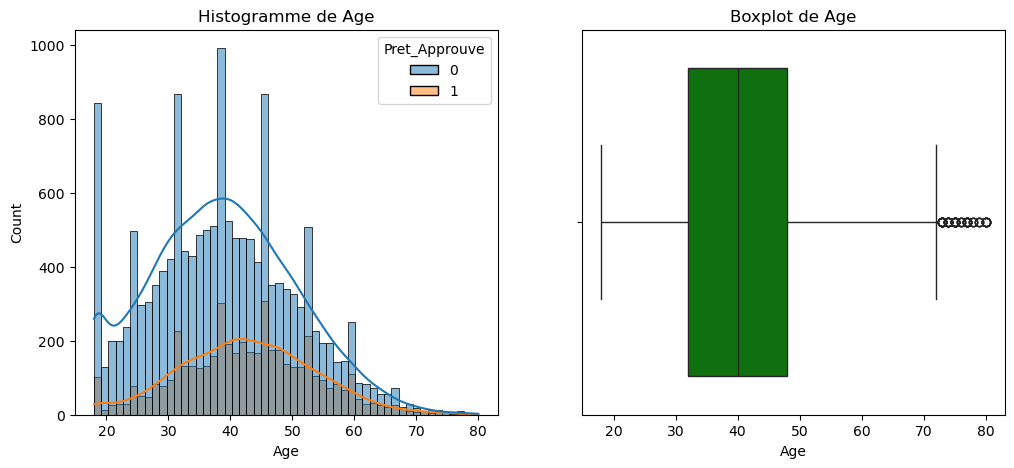

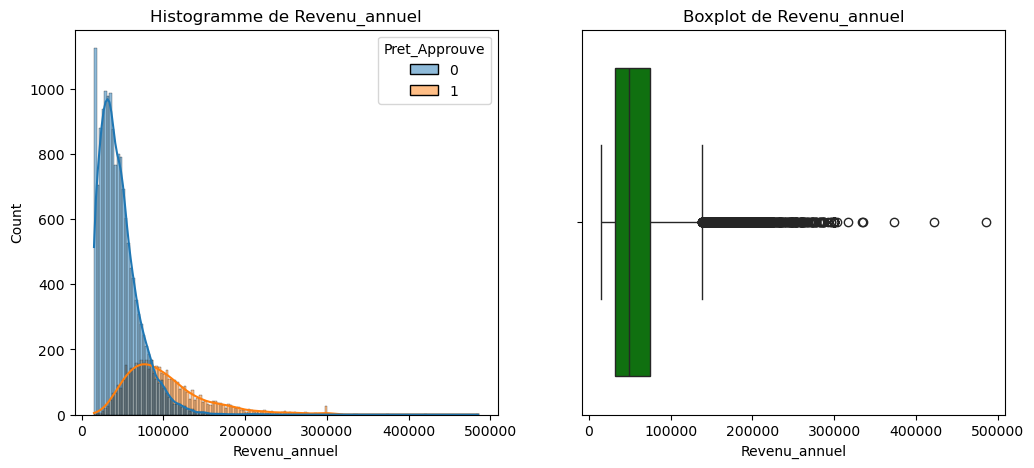

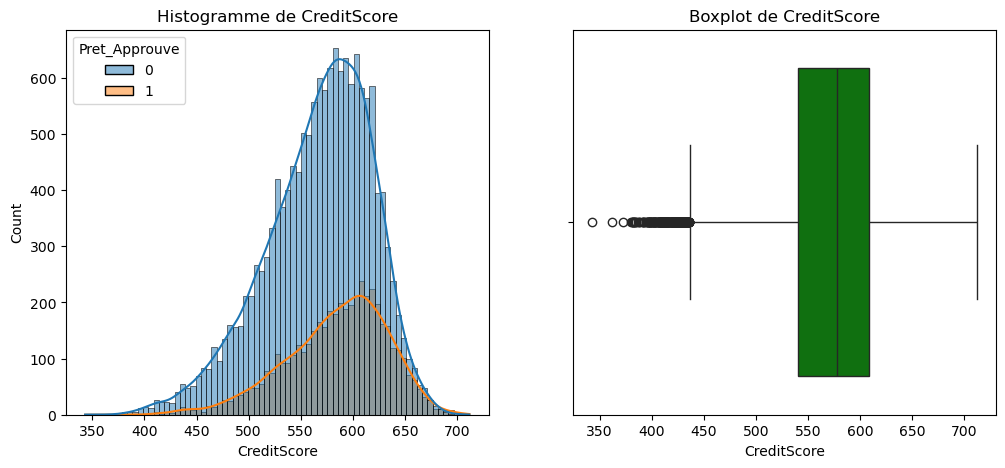

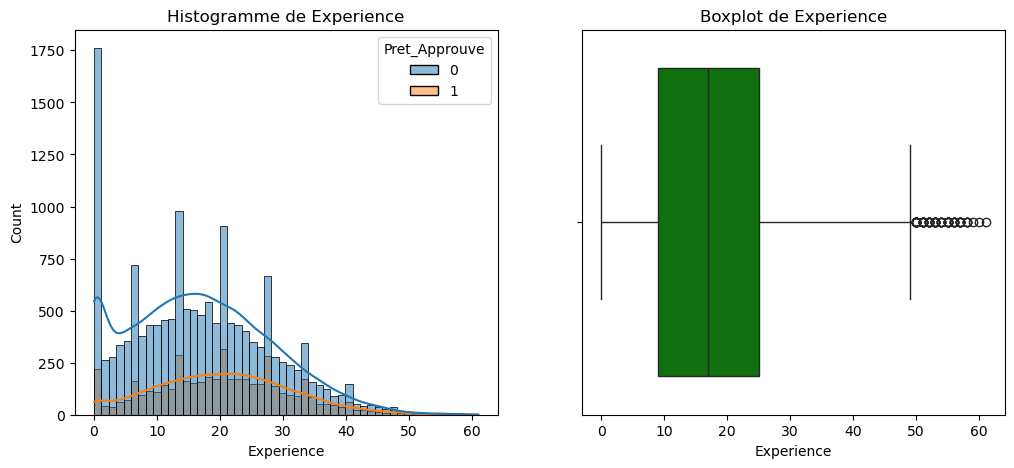

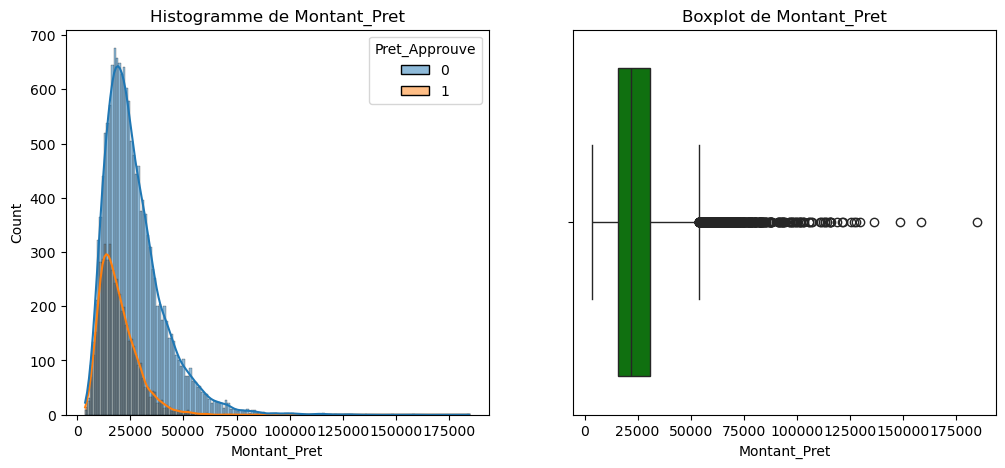

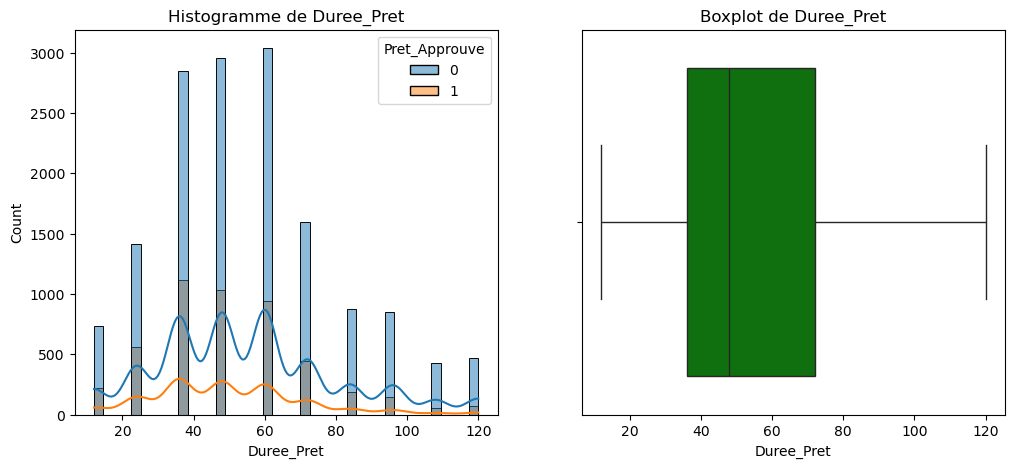

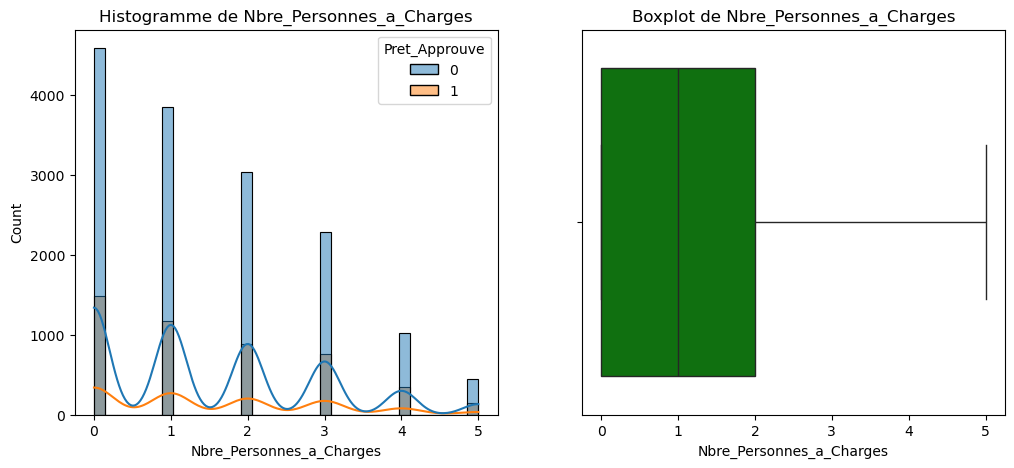

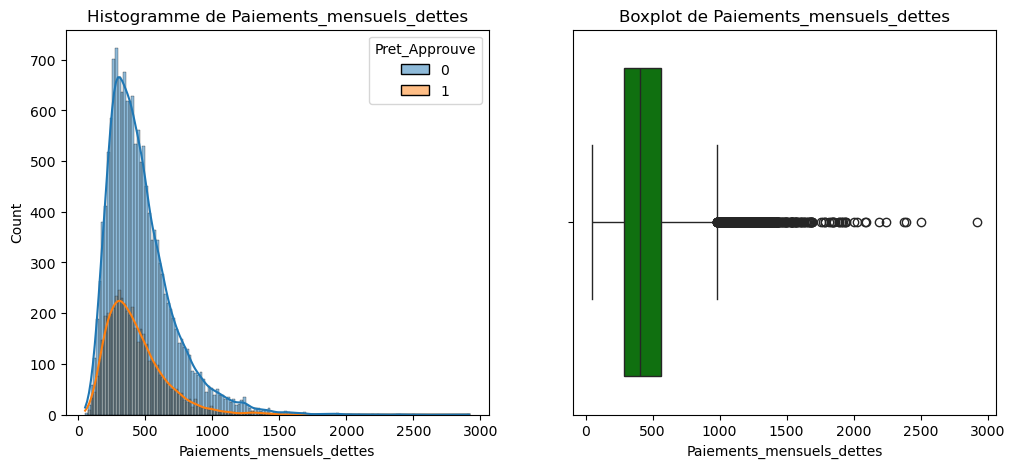

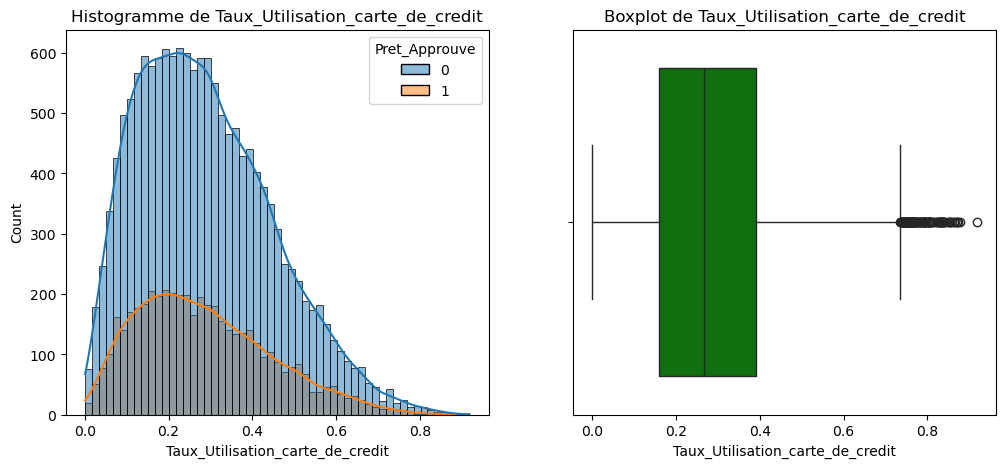

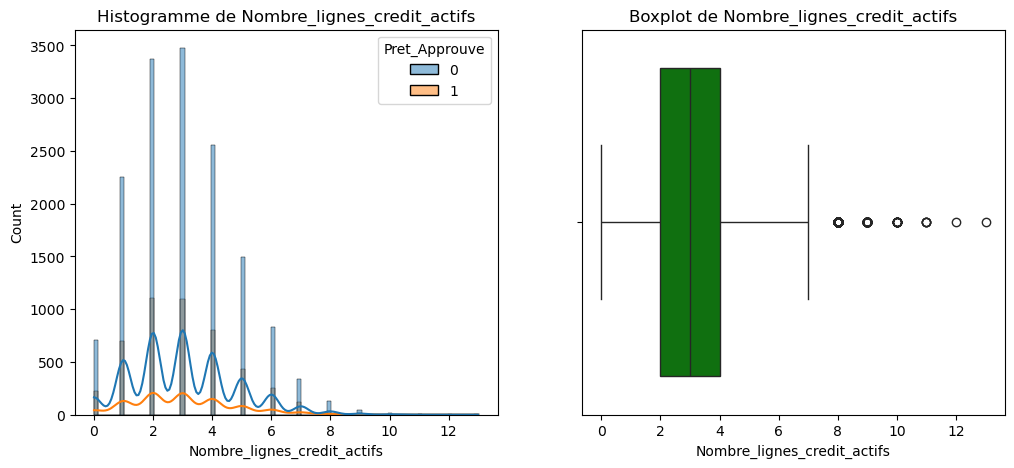

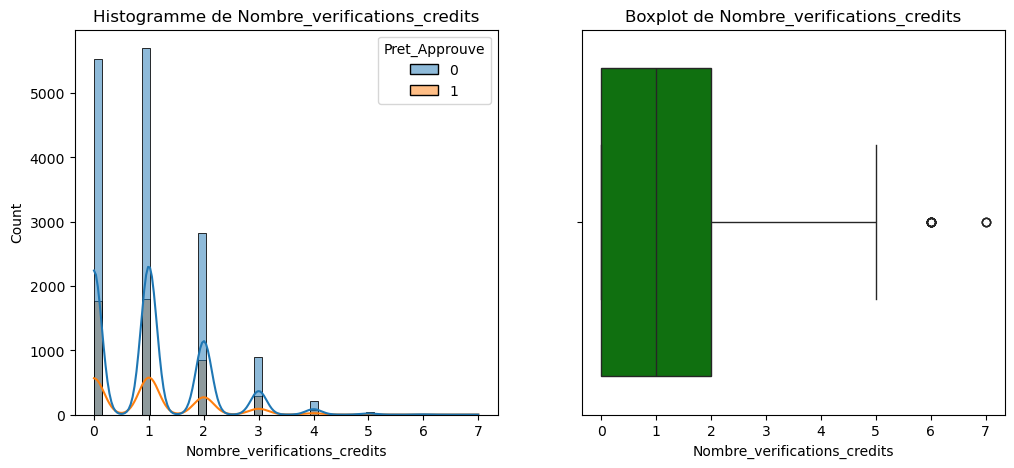

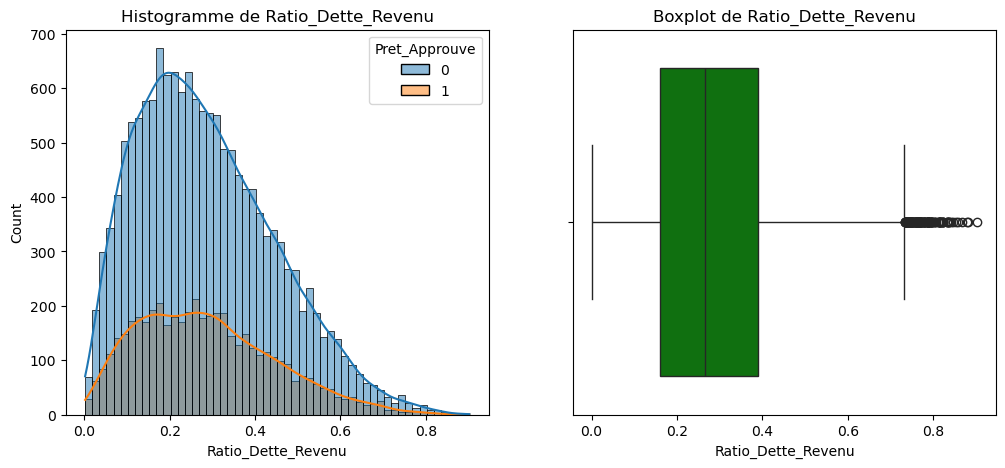

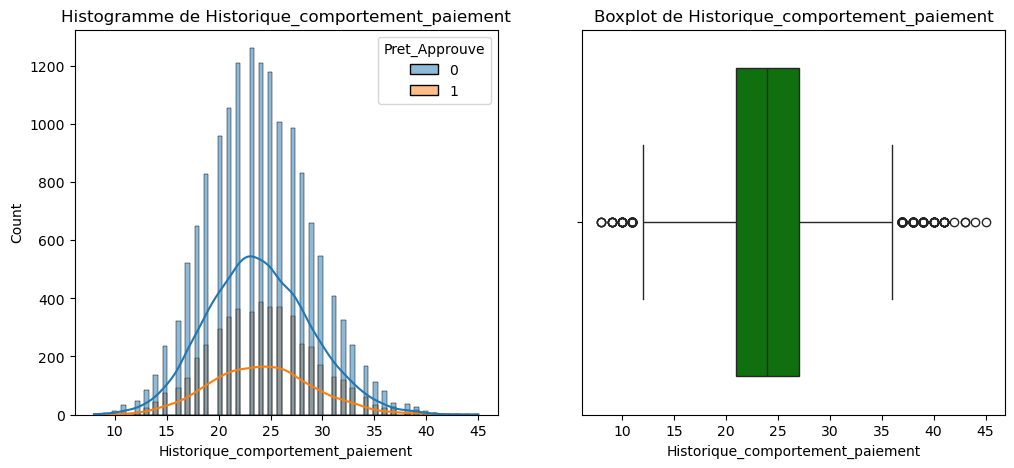

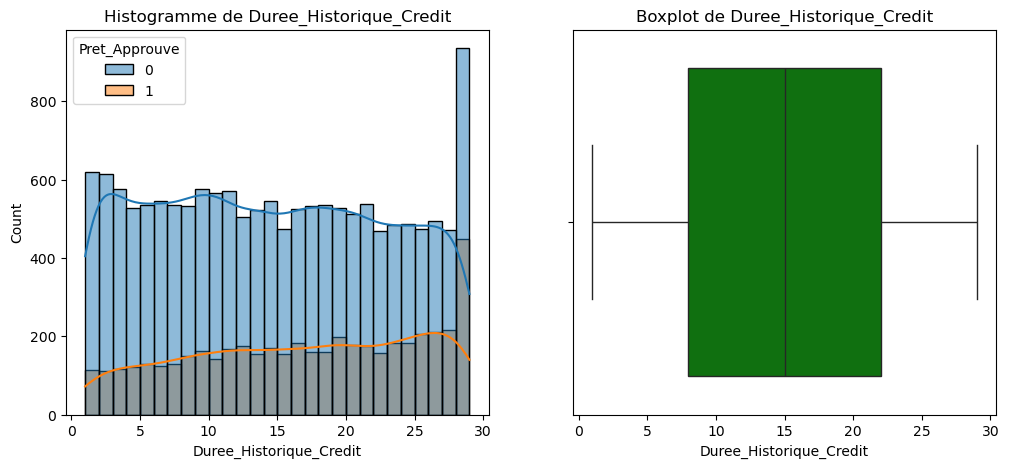

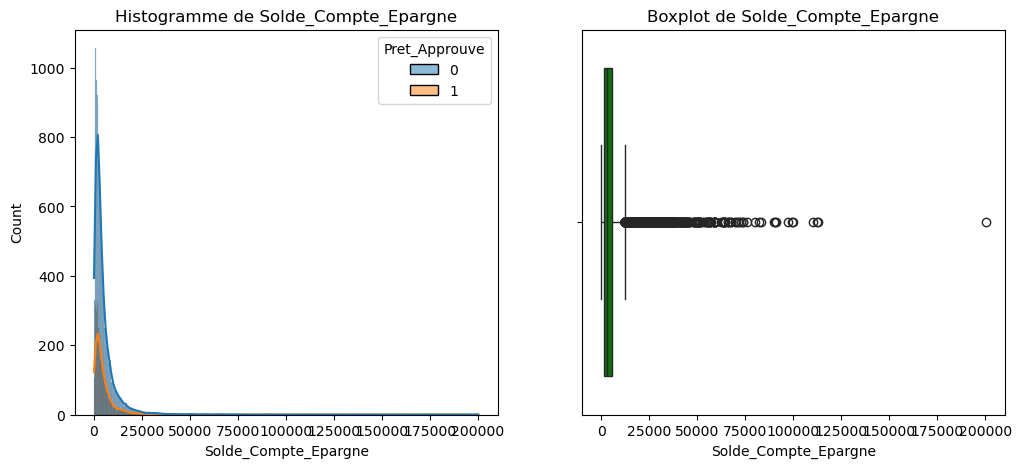

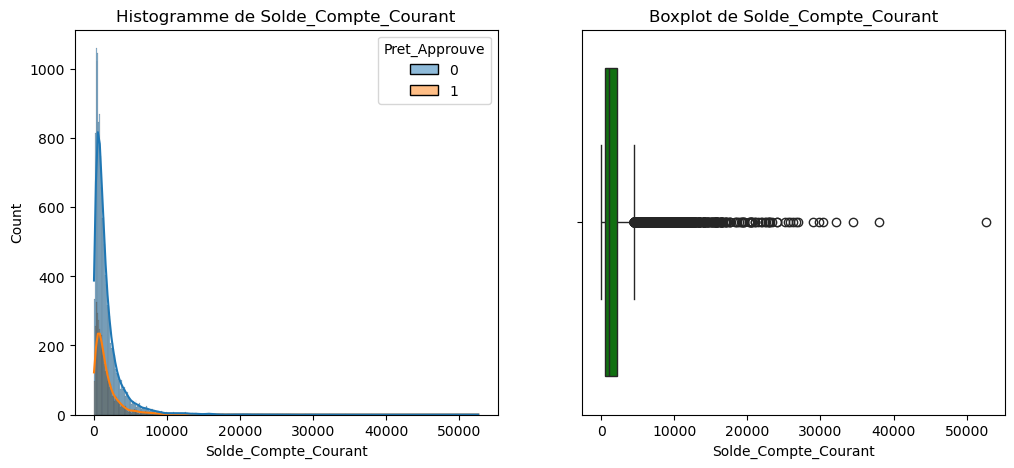

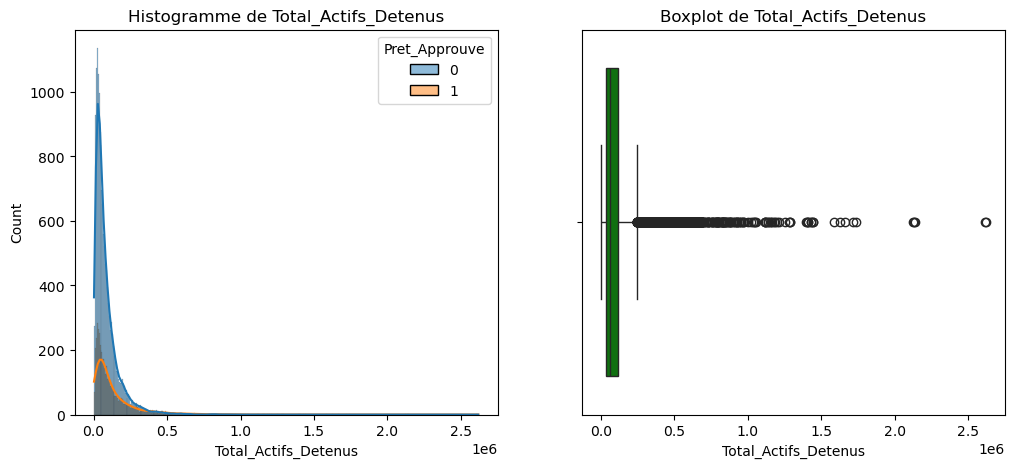

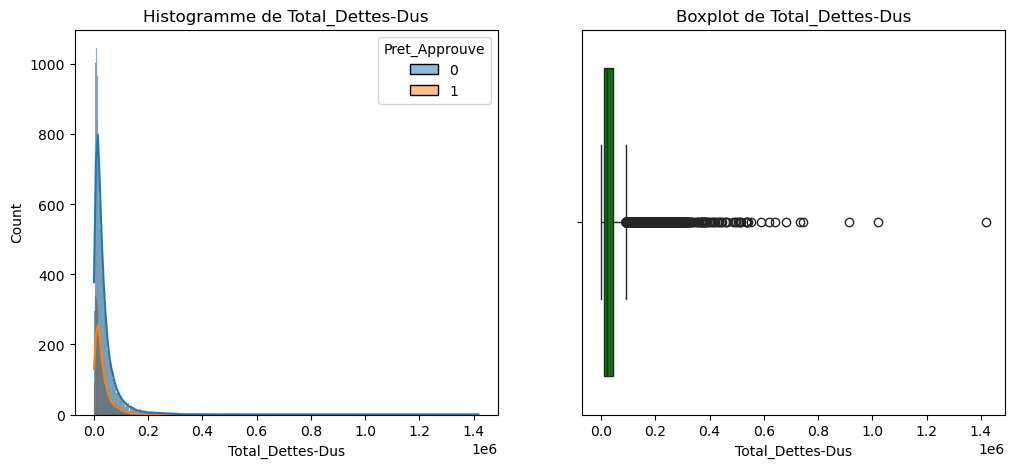

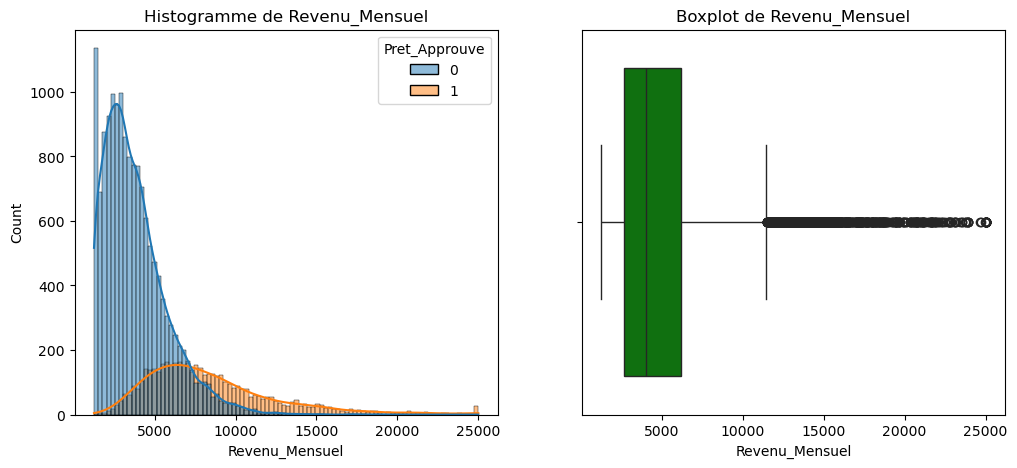

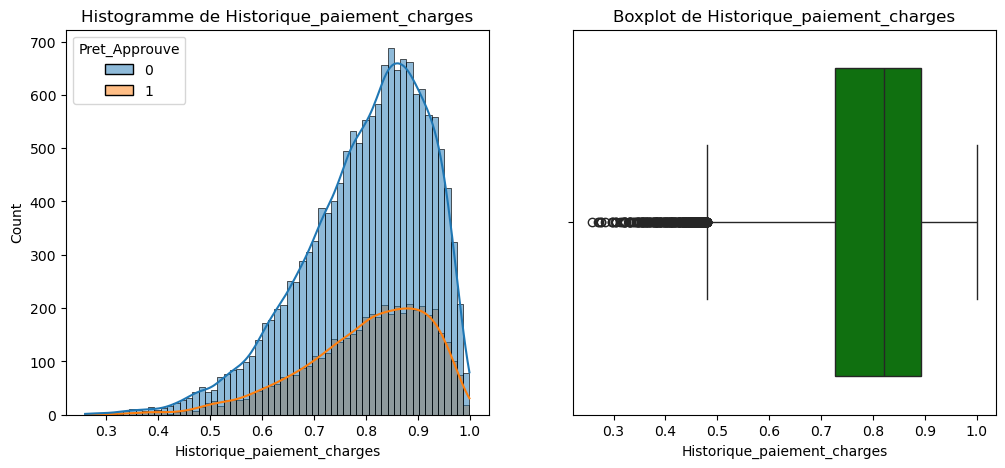

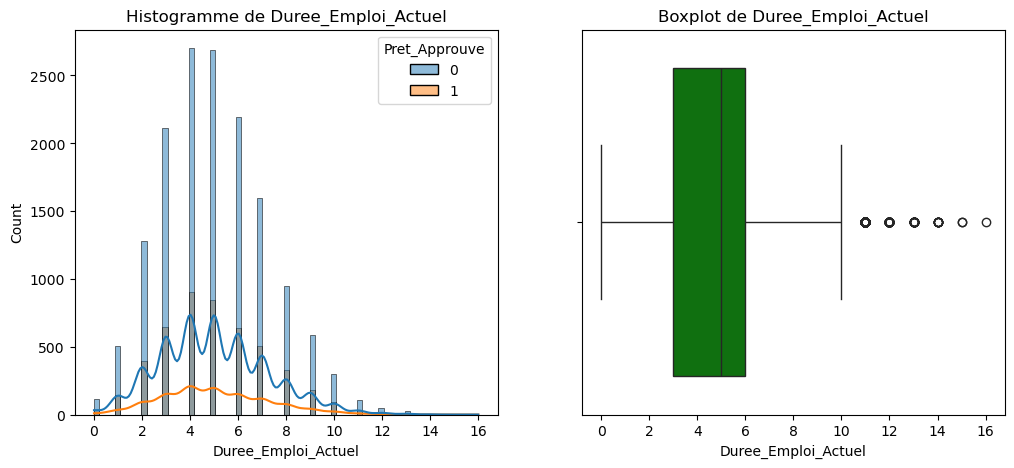

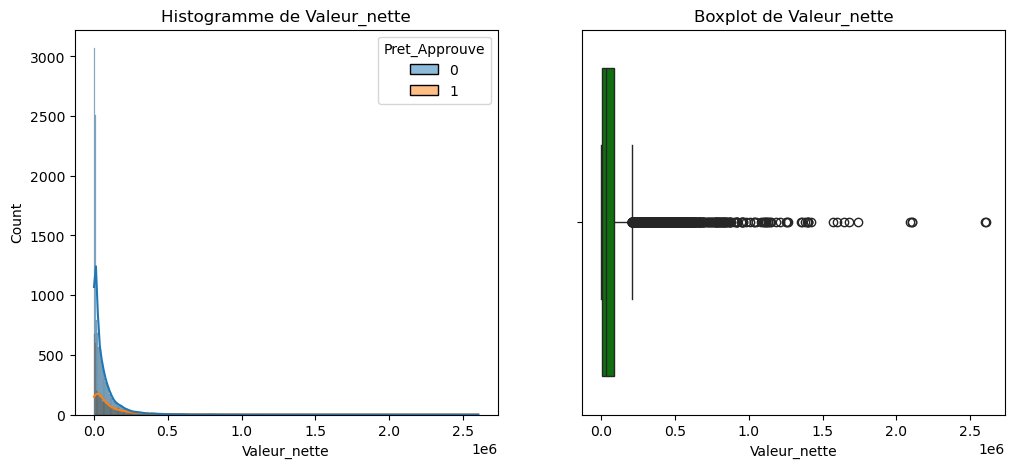

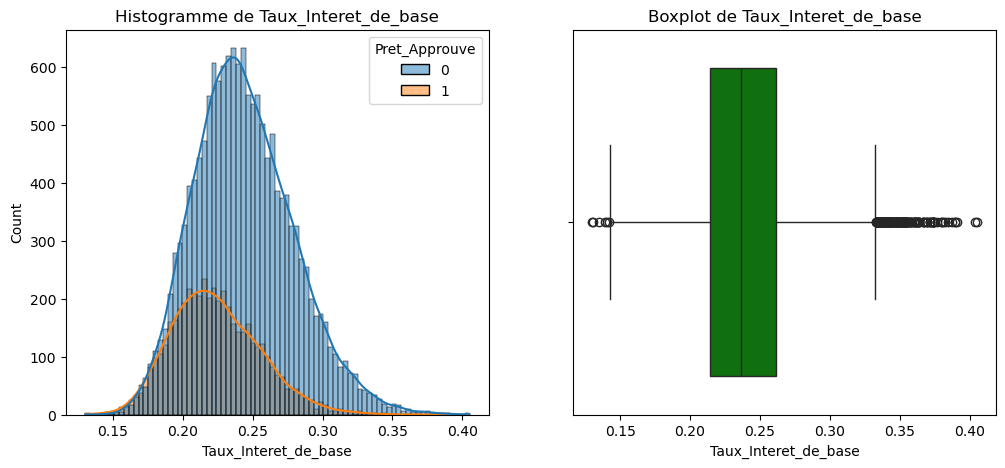

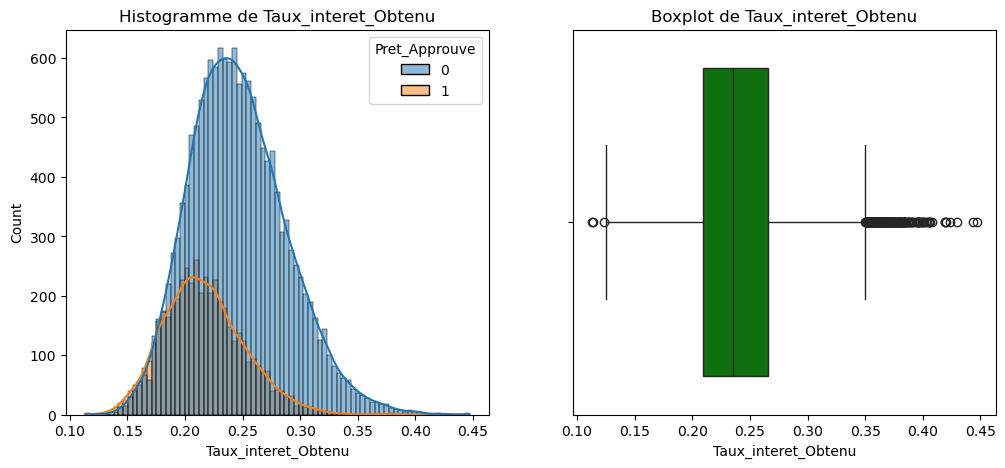

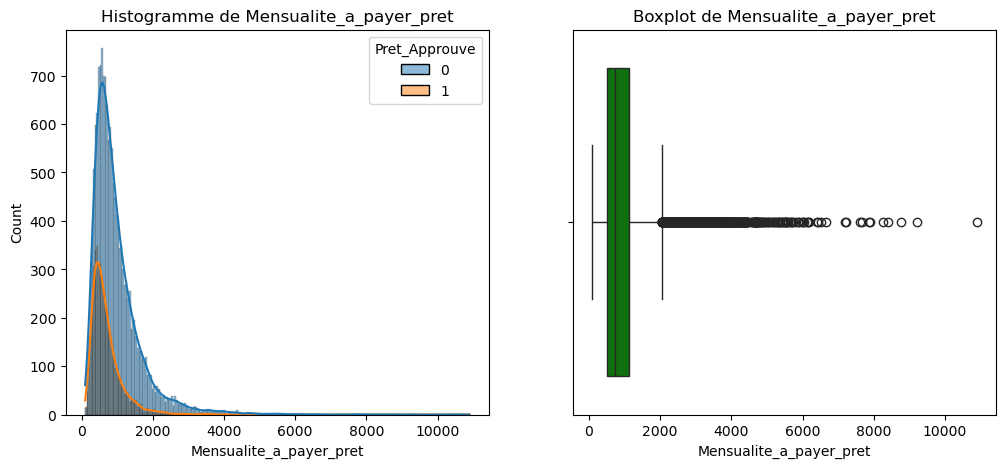

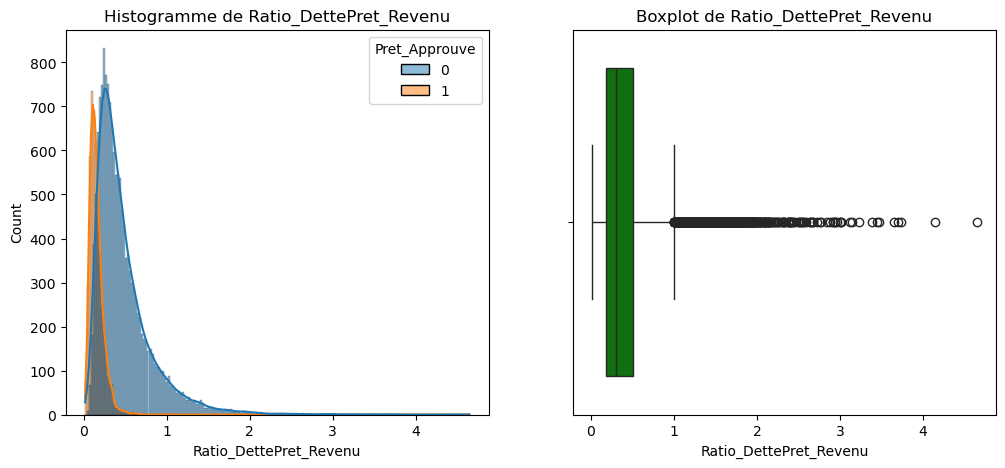

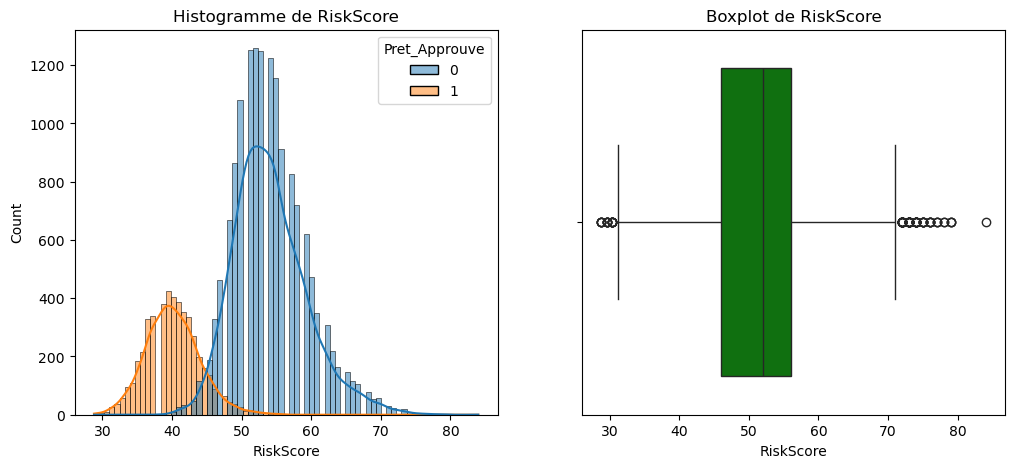

In [42]:
# Visualisation des distributions
variables = df.select_dtypes(include=['number'])
variables = variables.drop(columns=["Annee","Tx_Ratio_DettePret_Revenu"])
 
for var in variables:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=var, hue="Pret_Approuve", kde=True)
#    sns.histplot(df_city[var], kde=True, color='purple')
    plt.title(f"Histogramme de {var}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[var], color='green')
    plt.title(f"Boxplot de {var}")
    plt.show()

#### 4-2 Traitement des valeurs aberrantes et/ou extremes

##### 4-2-1 Traitement avec la Methode de l'écart interquartile

##### 4-2-1 Test IQR avec la Colonne "Revenu_annuel"

In [43]:
# Colonne à analyser
var = "Solde_Compte_Courant"
# Calcul de Q1, Q3 et IQR
Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers
outliers = df[(df[var] < Q1 - 1.5 * IQR) | (df[var] > Q3 + 1.5 * IQR)]

# Affichage des outliers détectés
print("Nombre de Valeurs aberrantes détectées :")
print(outliers.shape)


Nombre de Valeurs aberrantes détectées :
(1522, 49)


- **Commentaires**
    - on constate qu'en utilisant la methode IQR sur une colonne "Solde_Compte_Courant", nous avons 331 lignes de données abérrantes. Cela peut s'expliquer par le fait que les données ont une simulation sur plusieurs periodes différentes.
    - Pour eviter de reduire fortement les données pour l'analyse de predicyions, nous allons plutot utiliser des seuils pour les colonnes que nous constatons des outliers possibles
    - Les colonnes issues des calculs des colonnes numeriques existantes ne seront pas pris en compte pour les outliers en dehors de Valeur_nette.
    - Les colonnes CreditScore et RiskScore seront pas pris en compte pour les outliers car ce sont des colonnes determinant pour le credit et le resultat determine le profil client.
    - Les colonnes Taux de credit ne seront pas en compte car elle reflete une tendance selon l'époque ou elle a été attribuée


##### 4-2-2 Outliers avec la Colonne "Age"

In [44]:
# En consultant le Boxplot "Age", en peut determiner un seuil :
var = "Age"
seuil = 75
outliers = df[df[var] > seuil]
print(outliers.shape)
df = df[df[var] <= seuil]
print(df.shape)

(28, 49)
(19972, 49)


##### 4-2-3 Outliers avec la Colonne "Revenu_annuel"

In [45]:
# En consultant le Boxplot "Revenu_annuel", en peut determiner un seuil :
var= "Revenu_annuel"
seuil = 320000

outliers = df[df[var] > seuil]
print(outliers.shape)
df = df[df[var] <= seuil]
print(df.shape)

(5, 49)
(19967, 49)


##### 4-2-4 Outliers avec la Colonne "Montant_Pret"

In [46]:
# En consultant le Boxplot"Montant_Pret" , en peut detrminer un seuil :
var= "Montant_Pret"
seuil = 130000

outliers = df[df[var] > seuil]
print(outliers.shape)
df = df[df[var] <= seuil]
print(df.shape)

(4, 49)
(19963, 49)


##### 4-2-4 Outliers avec la Colonne "Paiements_mensuels_dettes "

In [47]:
# En consultant le Boxplot "Paiements_mensuels_dettes, en peut detrminer un seuil :
var= "Paiements_mensuels_dettes"
seuil = 2200

outliers = df[df[var] > seuil]
print(outliers.shape)
df = df[df[var] <= seuil]
print(df.shape)

(5, 49)
(19958, 49)


##### 4-2-5 Outliers avec la Colonne "Taux_Utilisation_carte_de_credit"

In [48]:
# En consultant le Boxplot "Taux_Utilisation_carte_de_credit", en peut detrminer un seuil :
var= "Taux_Utilisation_carte_de_credit"
seuil = 0.9

outliers = df[df[var] > seuil]
print(outliers.shape)
df = df[df[var] <= seuil]
print(df.shape)

(1, 49)
(19957, 49)


##### 4-2-6 Outliers avec la Colonne "Nombre_lignes_credit_actifs"

In [49]:
# En consultant le Boxplot "Nombre_lignes_credit_actifs", en peut determiner un seuil :
var= "Nombre_lignes_credit_actifs"
seuil = 8

outliers = df[df[var] > seuil]
print(outliers.shape)
df = df[df[var] <= seuil]
print(df.shape)

(81, 49)
(19876, 49)


##### 4-2-7 Outliers avec la Colonne "Nombre_verifications_credits"

In [50]:
# En consultant le Boxplot  "Nombre_verifications_credits", en peut determiner un seuil :
var= "Nombre_verifications_credits"
seuil = 6

outliers = df[df[var] > seuil]
print(outliers.shape)
df = df[df[var] <= seuil]
print(df.shape)

(3, 49)
(19873, 49)


##### 4-2-8 Outliers avec la Colonne "Historique_comportement_paiement"

In [51]:
# En consultant le Boxplot "Historique_comportement_paiement", en peut determiner un seuil :
var= "Historique_comportement_paiement"
seuil = 40
seuil1 = 10 

outliers = df[df[var] > seuil]
outliers1 = df[df[var] < seuil1]
print(outliers.shape)
print(outliers1.shape)
df = df[df[var] <= seuil]
df = df[df[var] > seuil1]
print(df.shape)

(16, 49)
(9, 49)
(19834, 49)


##### 4-2-9 Outliers avec la Colonne "Valeur_nette"

In [52]:
# En consultant le Boxplot "Valeur_nette", en peut determiner un seuil :
var= "Valeur_nette"
seuil = 2000000

outliers = df[df[var] > seuil]
print(outliers.shape)
df = df[df[var] <= seuil]
print(df.shape)

(4, 49)
(19830, 49)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19830 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date_demande                      19830 non-null  datetime64[ns]
 1   Age                               19830 non-null  int64         
 2   Revenu_annuel                     19830 non-null  int64         
 3   CreditScore                       19830 non-null  int64         
 4   Statut_Emploi                     19830 non-null  object        
 5   Niveau_Education                  19830 non-null  object        
 6   Experience                        19830 non-null  int64         
 7   Montant_Pret                      19830 non-null  int64         
 8   Duree_Pret                        19830 non-null  int64         
 9   Etat_civil                        19830 non-null  object        
 10  Nbre_Personnes_a_Charges          19830 non-null  i

### 5- Matrice de corrélation

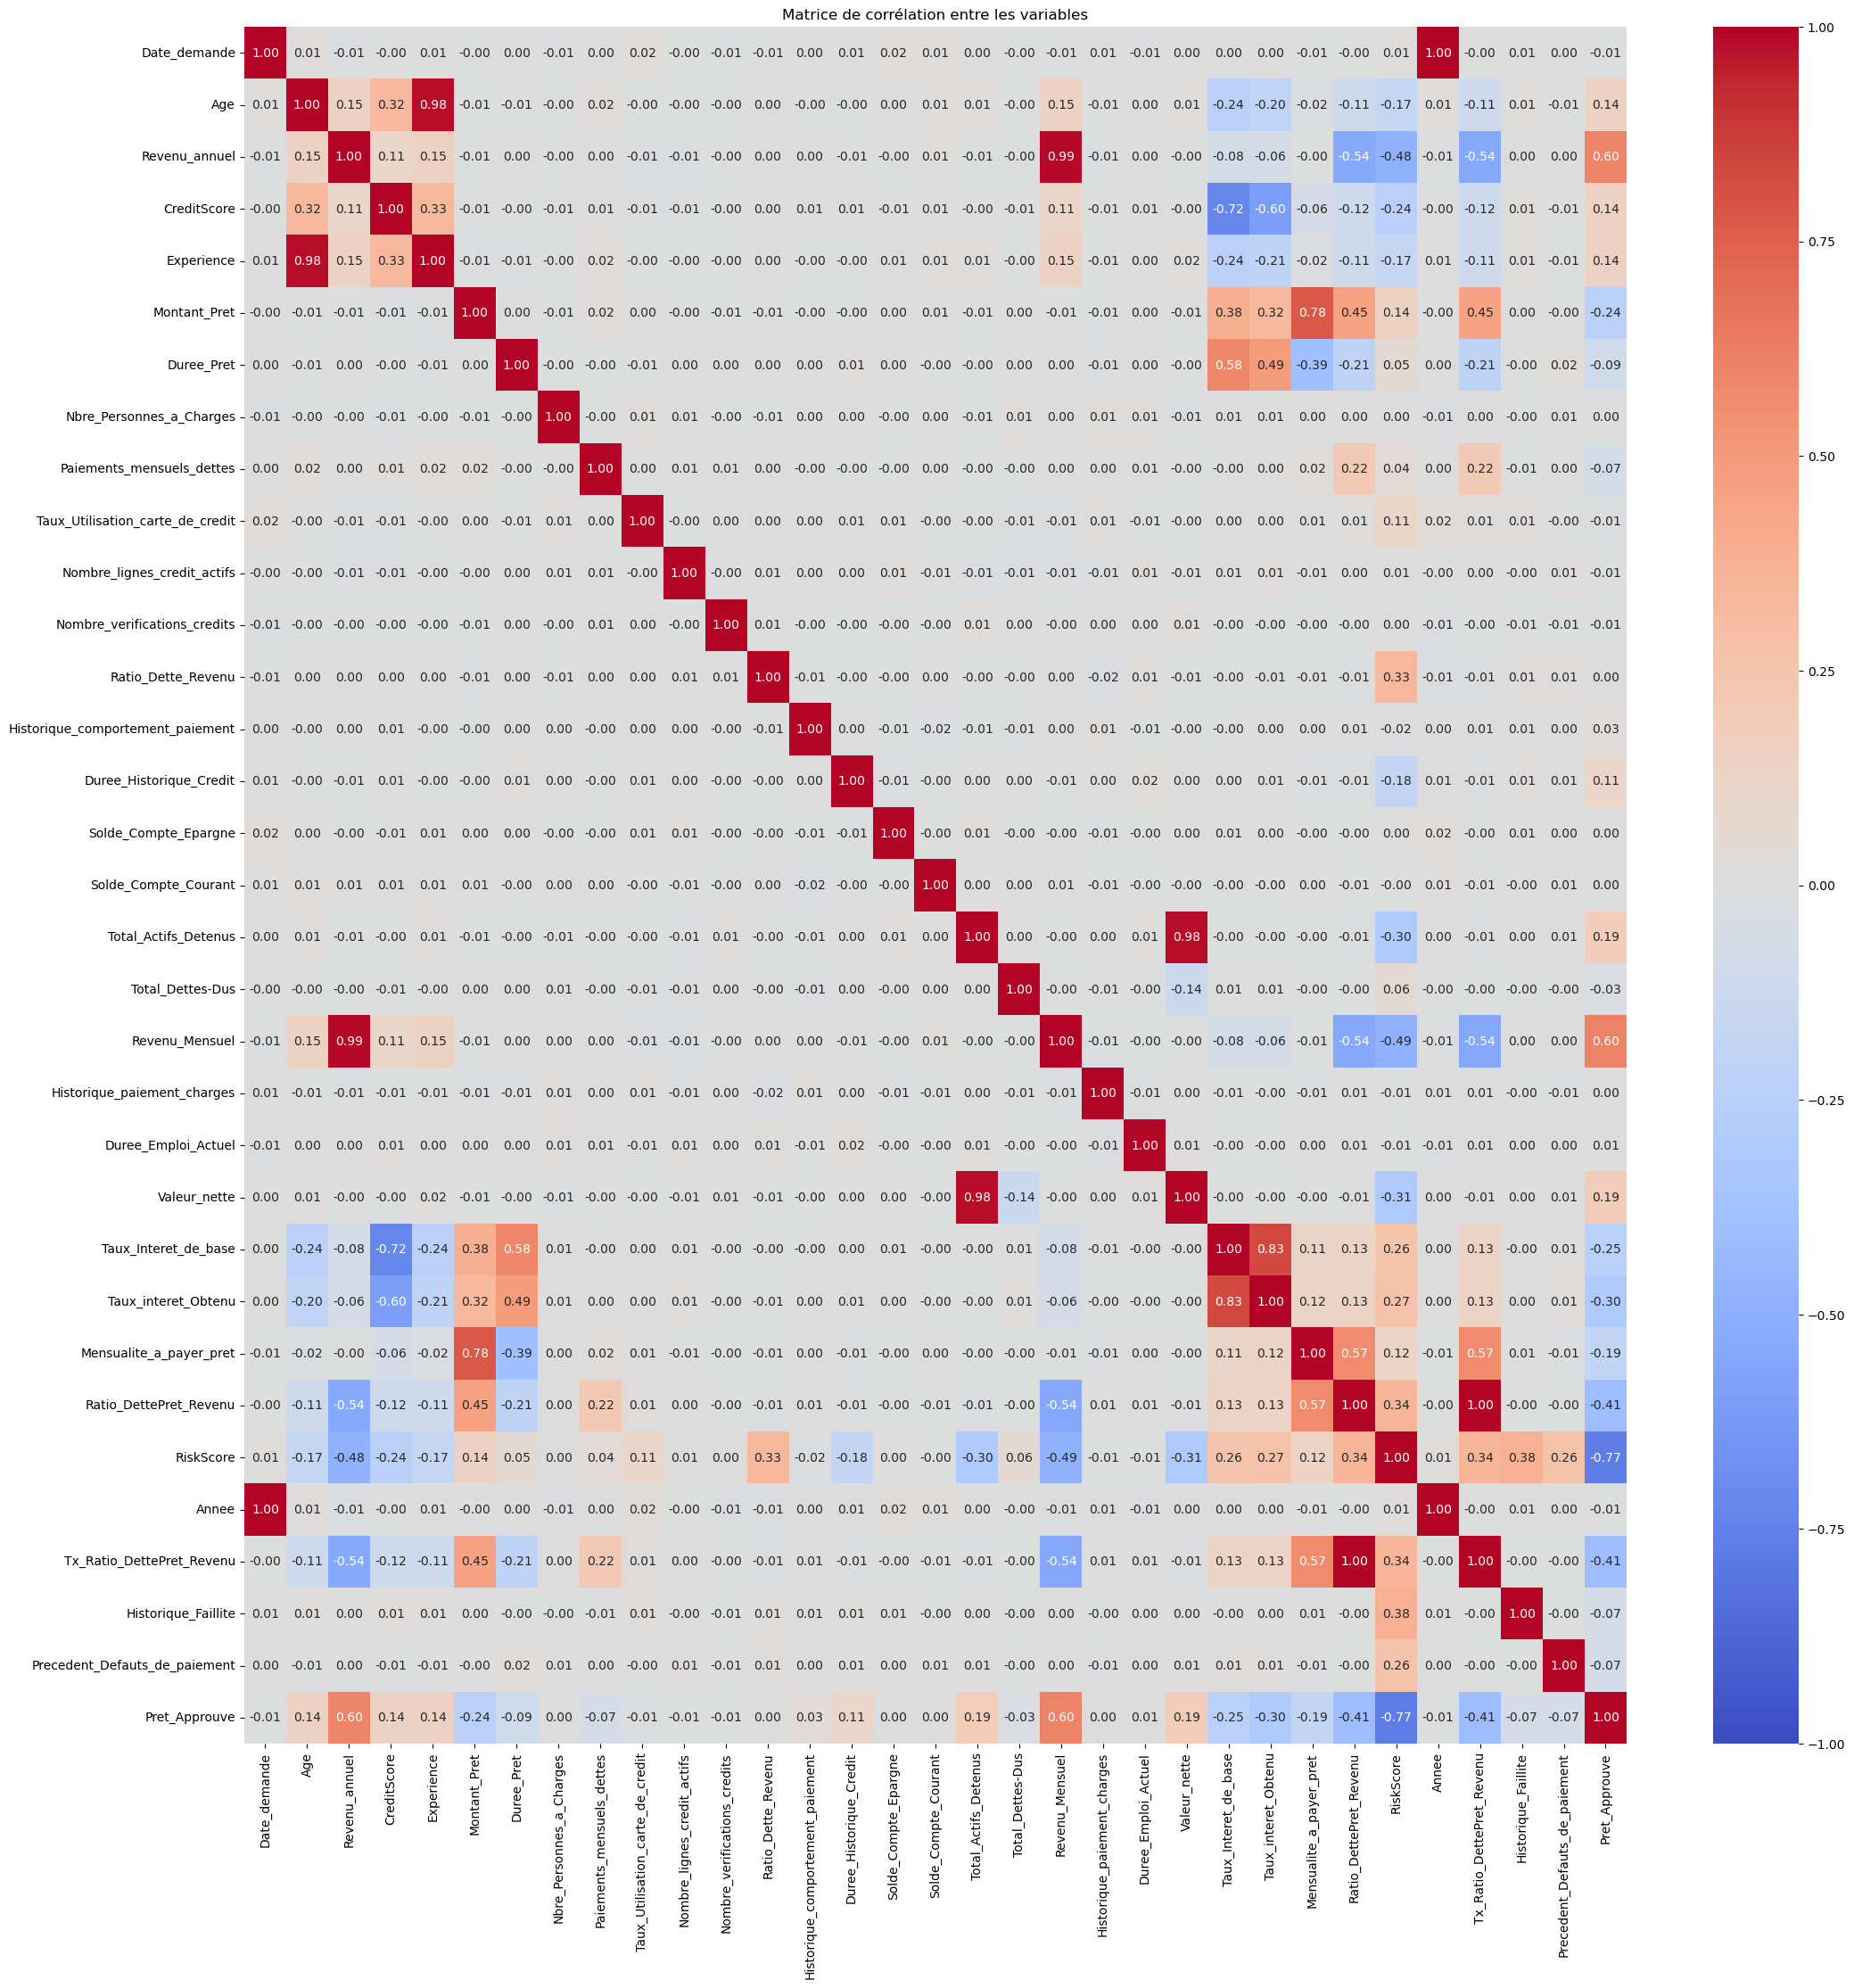


Corrélations avec Pret_Approuve:

Pret_Approuve                       1.000000
Revenu_Mensuel                      0.603490
Revenu_annuel                       0.599334
Valeur_nette                        0.190480
Total_Actifs_Detenus                0.186197
CreditScore                         0.142576
Age                                 0.141428
Experience                          0.141324
Duree_Historique_Credit             0.105308
Historique_comportement_paiement    0.027816
Duree_Emploi_Actuel                 0.006514
Historique_paiement_charges         0.004177
Nbre_Personnes_a_Charges            0.002117
Solde_Compte_Courant                0.000503
Ratio_Dette_Revenu                  0.000071
Solde_Compte_Epargne                0.000053
Nombre_verifications_credits       -0.005227
Nombre_lignes_credit_actifs        -0.005265
Annee                              -0.007147
Date_demande                       -0.007339
Taux_Utilisation_carte_de_credit   -0.011616
Total_Dettes-Dus    

In [54]:
# Calcul de la matrice de corrélation
correlation = df[['Date_demande','Age','Revenu_annuel','CreditScore','Experience','Montant_Pret','Duree_Pret','Nbre_Personnes_a_Charges','Paiements_mensuels_dettes','Taux_Utilisation_carte_de_credit','Nombre_lignes_credit_actifs','Nombre_verifications_credits','Ratio_Dette_Revenu','Historique_comportement_paiement','Duree_Historique_Credit','Solde_Compte_Epargne','Solde_Compte_Courant','Total_Actifs_Detenus','Total_Dettes-Dus','Revenu_Mensuel','Historique_paiement_charges','Duree_Emploi_Actuel','Valeur_nette','Taux_Interet_de_base','Taux_interet_Obtenu','Mensualite_a_payer_pret','Ratio_DettePret_Revenu','RiskScore','Annee','Tx_Ratio_DettePret_Revenu','Historique_Faillite','Precedent_Defauts_de_paiement','Pret_Approuve']].corr()

#plt.figure(figsize=(12,12))
#sns.heatmap(correlation, annot=True, cmap='viridis', vmin=-1, vmax=1)

plt.figure(figsize=(25, 25))
#sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)


plt.title('Matrice de corrélation entre les variables')
plt.show()

print("\nCorrélations avec Pret_Approuve:\n")
print(correlation['Pret_Approuve'].sort_values(ascending=False))

##### INTERPRETATION DE LA MATRICE DE CORRELATION Par Rapport à **Pret_Approuve** 
* On constate que 2 colonnes suivantes ont une une forte corrélation positive sur Pret_Approuve
  * Revenu_Mensuel                      0.603490
  * Revenu_annuel                       0.599334<br>

* On constate que 4 colonnes suivantes ont une une forte corrélation négative sur Pret_Approuve
  * RiskScore                          -0.766023
  * Ratio_DettePret_Revenu             -0.411045    
  * Tx_Ratio_DettePret_Revenu          -0.411045
  * Taux_interet_Obtenu                -0.302145<br>
    
* on constate que les colonnes suivantes ont peu d'impact positives  sur Pret_Approuve :
    * Duree_Emploi_Actuel                 0.006514
    * Historique_paiement_charges         0.004177
    * Nbre_Personnes_a_Charges            0.002117
    * Solde_Compte_Courant                0.000503
    * Ratio_Dette_Revenu                  0.000071
    * Solde_Compte_Epargne                0.000053<br>

* on constate que les colonnes suivantes ont peu d'impact négatives   sur Pret_Approuve :
    * Nombre_verifications_credits       -0.005227
    * Nombre_lignes_credit_actifs        -0.005265
    * Annee                              -0.007147
    * Date_demande                       -0.007339
   
  
##### MULTICOLINEARITE
* la feature **Experience** et **age** ont une correlation de **0.98**. la feature **age** etant la mieux correlée avec **Pret_Approuve**, c'est elle qui sera conservée pour eviter une mauvaise prediction.
* la feature **Annee** et **Date_demande** ont une correlation de **1**. la feature **Annee** etant la mieux correlée avec **Pret_Approuve**, c'est elle qui sera conservée pour eviter une mauvaise prediction. 
* la feature **Revenu_Mensuel** et **Revenu_annuel** ont une correlation de **0.99**. la feature **Revenu_Mensuel** etant la mieux correlée avec **Pret_Approuve**, c'est elle qui sera conservée pour eviter une mauvaise prediction.
* la feature **Valeur_nette** et **Total_Actifs_Detenus** ont une correlation de **0.98**. la feature **Valeur_nette** etant la mieux correlée avec **Pret_Approuve**, c'est elle qui sera conservée pour eviter une mauvaise prediction.
la feature **Tx_Ratio_DettePret_Revenu** et **Ratio_DettePret_Revenu** ont une correlation de **1**. la feature **Tx_Ratio_DettePret_Revenu** etant presentée en pourcentage,  , c'est elle qui sera conservée pour eviter une mauvaise prediction.

##### FEATURES EXCLUS SUITE A MULTICOLINEARITE
<span style="color: red;">Experience</span><BR>
<span style="color: red;">Date_demande</span><BR>
<span style="color: red;">Revenu_annuel</span><BR>
<span style="color: red;">Total_Actifs_Detenus</span><BR>
<span style="color: red;">Ratio_DettePret_Revenu</span><BR>

##### FEATURES EXCLUS : Trop faible IMPACT  (0,00xxxx d'impact) sur **Pret_Approuve**
<span style="color: purple;">Duree_Emploi_Actuel </span><BR>
<span style="color: purple;">Historique_paiement_charges</span><BR>
<span style="color: purple;">Nbre_Personnes_a_Charges</span><BR>
<span style="color: purple;">Solde_Compte_Epargne</span><BR>
<span style="color: purple;">Solde_Compte_Courant</span><BR>
<span style="color: purple;">Ratio_Dette_Revenu</span><BR>
<span style="color: purple;">Nombre_lignes_credit_actifst</span><BR>
<span style="color: purple;">Annee</span><BR>
<span style="color: purple;">Nombre_verifications_credits </span><BR>




### 6- Régression Logistique

#### 6-1 Sélection des Features et de la Target

**Selection des Features**

* Listes des features retenue suite à  l'analyse de la matrice correlation :
    * 'Pret_Approuve',
    * 'Revenu_Mensuel',
    * 'Valeur_nette',
    * 'CreditScore',
    * 'Age',
    * 'Duree_Historique_Credit',
    * 'Historique_comportement_paiement',
    * 'Taux_Utilisation_carte_de_credit',
    * 'Total_Dettes-Dus',
    * 'Precedent_Defauts_de_paiement',
    * 'Paiements_mensuels_dettes',
    * 'Historique_Faillite',
    * 'Duree_Pret',
    * 'Mensualite_a_payer_pret',
    * 'Montant_Pret',
    * 'Taux_Interet_de_base',
    * 'Taux_interet_Obtenu',
    * 'Tx_Ratio_DettePret_Revenu',
    * 'RiskScore',


In [55]:
# Selection des colonnes
X = df[['Revenu_Mensuel','Valeur_nette','CreditScore','Age','Duree_Historique_Credit','Historique_comportement_paiement','Taux_Utilisation_carte_de_credit','Total_Dettes-Dus','Precedent_Defauts_de_paiement','Paiements_mensuels_dettes','Historique_Faillite','Duree_Pret','Mensualite_a_payer_pret','Montant_Pret','Taux_Interet_de_base','Taux_interet_Obtenu','Tx_Ratio_DettePret_Revenu','RiskScore'
]]

# Selection de l'objectif
y = df['Pret_Approuve']  # Pret_Approuve : 1 si le client a abtenu le pret, 0 si  refus

#### 6-2 Prétraitement des données

In [56]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 6-3 Entrainement du modele

In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)

D:\Users\rmama\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 6-4 Most important features

                             feature  coefficient  importance
2                        CreditScore    -0.003479    0.003479
17                         RiskScore    -0.002719    0.002719
11                        Duree_Pret    -0.002608    0.002608
9          Paiements_mensuels_dettes    -0.001228    0.001228
0                     Revenu_Mensuel     0.000816    0.000816
16         Tx_Ratio_DettePret_Revenu    -0.000737    0.000737
4            Duree_Historique_Credit     0.000523    0.000523
5   Historique_comportement_paiement    -0.000187    0.000187
13                      Montant_Pret    -0.000155    0.000155
12           Mensualite_a_payer_pret     0.000028    0.000028
8      Precedent_Defauts_de_paiement    -0.000018    0.000018
10               Historique_Faillite    -0.000014    0.000014
3                                Age     0.000012    0.000012
15               Taux_interet_Obtenu    -0.000010    0.000010
1                       Valeur_nette     0.000007    0.000007
14      

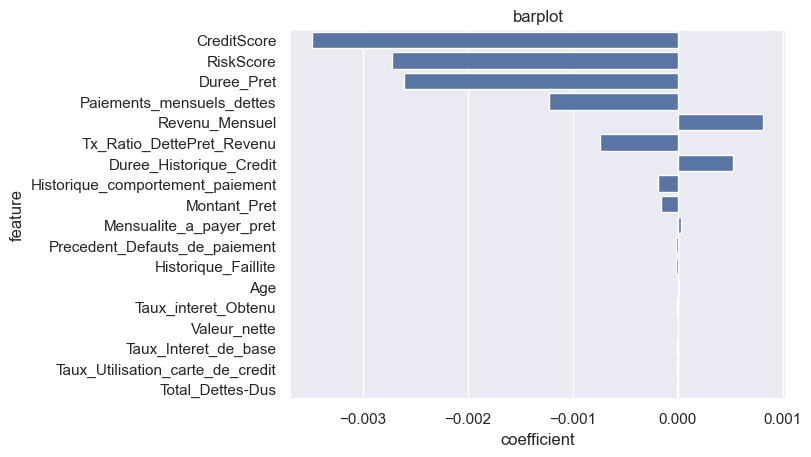

In [58]:
importance_model = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_[0],
    "importance": np.abs(model.coef_[0])
}).sort_values(by="importance", ascending=False)
table_most = importance_model
print(table_most)

#plt.figure(figsize=(12,5))
#plt.subplot(1,2,1)
sns.set_palette('dark')
sns.set_theme()
# sns.histplot(data=df, x=var, , kde=True)
sns.barplot(data=table_most, y='feature', x='coefficient', errorbar='ci')
#    sns.histplot(df_city[var], kde=True, color='purple')
plt.title('barplot')
plt.show()

**INTERPRETATION du Most important features** 
* Coefficient > 0 → augmente la probabilité d’obtenir le crédit
* Coefficient < 0 → diminue la probabilité
* Valeur du Coefficient élevé → variable influente

**On constate qu'une dizaine de variable ont une influence importante dans l'obtention du credit :**
   
- **`1-CreditScore`**:
  C'est le 1e element  impactant pour l'obtention du credit. Si vous etes dans la tranche passable ou faible, votre probabilté d'avoir votre credit est tres faible.

- **`2-RiskScore`**:
  C'est le 2e element  impactant pour l'obtention du credit. Si vous etes dans la tranche haute, , votre probabilté d'avoir votre credit est tres faible.

- **`3-Duree_Pret`**:
  C'est le 3e element  impactant  du credit. Si  la duree du credit est long au dela des 15 ans, cela baisse votre probabilité pour l'obtention du credit.

- **`4-Paiements_mensuels_dettes`**: 
  C'est le 4e element  impactant  du credit. Si le montant de vos remboursements de la dette est importante, moins vous avez la probabilité d'obtenir le credit.
    
- **`5-Revenu_Mensuel`**: 
  C'est le 5e element  impactant pour l'obtention du credit. Si vous etes dans la tranche haute, votre probabilté d'avoir votre credit est meilleure, cela ameliore votre probabilité.

- **`6-Tx_Ratio_DettePret_Revenu`**:
  C'est le 6e element  impactant  du credit. Si votre ratio est au dessus de la tranche "Rat_DR_30%" (plus de 30%) , cela baisse votre probabilité pour l'obtention du credit.

- **`7- Duree_Historique_Credit`**: 
  C'est le 7e element  impactant  du credit. Si votre avez un hidtorique de pret credit est important, cela vous donne une probabilité meilleure pour l'obtention du credit.

- **`8-Historique_comportement_paiement`**: 
  C'est le 8e element  impactant  du credit. Si vous avez eu des incidents de paiement ou des retards, cela baisse votre probabilité pour l'obtention du credit.
  
- **`9-Montant_Pret`**: 
  C'est le 9e element  impactant  du credit. Si  le montant du pret est elevé, cela baisse votre probabilité pour l'obtention du credit.

- **`10- Mensualite_a_payer_pret`**: 
  C'est le 10e element  impactant  du credit. Si  le montant de la mensualité est elevé, cela baisse votre probabilité pour l'obtention du credit.
 



#### 6-5 Modification des Features suite au resultat du Most important features

In [59]:
# Nouvelle Selection des colonnes
X = df[['CreditScore','RiskScore','Duree_Pret','Paiements_mensuels_dettes','Revenu_Mensuel','Tx_Ratio_DettePret_Revenu','Duree_Historique_Credit','Historique_comportement_paiement','Montant_Pret','Mensualite_a_payer_pret']]

#### 6-6 Prétraitement des données avec nouvelle colonne X reduites

In [60]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 6-7 Entrainement du modele V2

In [61]:
model = LogisticRegression(max_iter=4000)
model.fit(X_train, y_train)

D:\Users\rmama\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=4000)

#### 6-8. Évaluation du modèle

In [62]:
predictions = model.predict(X_test)

rl_accuracy = accuracy_score(y_test, predictions)
rl_precision = precision_score(y_test, predictions)
rl_recall = recall_score(y_test, predictions)

print("Accuracy:", rl_accuracy)
print("Precision:", rl_precision)
print("Recall:", rl_recall)

print(f'Précision du modèle en %                       : {rl_accuracy * 100:.2f}%')
print(f'Nombre de prédictions positifs bien effectuées : {rl_precision * 100:.2f}%')
print(f'Nombre de positifs (approuvé) bien prédit      : {rl_recall * 100:.2f}%')

Accuracy: 0.9873928391326273
Precision: 0.9785867237687366
Recall: 0.9682203389830508
Précision du modèle en %                       : 98.74%
Nombre de prédictions positifs bien effectuées : 97.86%
Nombre de positifs (approuvé) bien prédit      : 96.82%


- model.predict(X_test) utilise le modèle entraîné pour faire des prédictions sur l'ensemble de test (X_test).
- la fonction accuracy_score(y_test, predictions) calcule la précision du modèle, c'est-à-dire le pourcentage de prédictions correctes par rapport à l'ensemble de test.
- La fonction precision_score est utilisée pour calculer la précision du modèle concernant la proportion de vrais positifs (client ayant le pret approuvé) parmi les predictions des clients positifs. c’est le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs prédit (Vrai Positif + Faux Positif). 
- La fonction recall_score est utilisée pour calculer le rappel du classificateur,  c’est le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs (Vrai Positif + Faux Négatif).

#### 6-9. Création de la matrice de confusion

In [63]:
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)

- conf_matrix = confusion_matrix(y_test, predictions) génère une matrice de confusion, qui est un tableau montrant les prédictions correctes et incorrectes du modèle, comparées aux valeurs réelles.
- La matrice aide à visualiser la performance du modèle, en montrant notamment le nombre de vrais positifs (TP), faux positifs (FP), vrais négatifs (TN), et faux négatifs (FN).

##### 6-9-1. Affichage de la matrice de confusion

Matrice de confusion :
[[3002   20]
 [  30  914]]


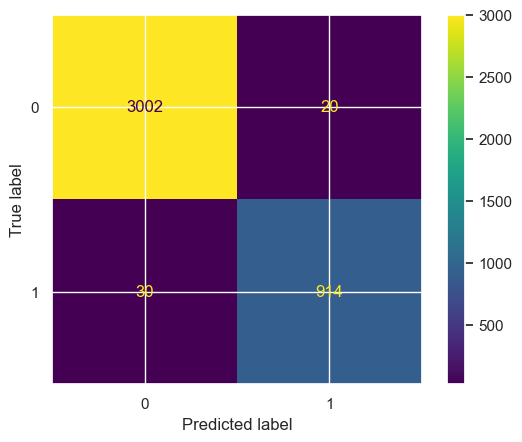

In [64]:
# Affichage de la matrice de confusion
print('Matrice de confusion :')
print(conf_matrix)

# cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

##### 6-9-2. Lecture de la matrice de confusion

##### Lecture de la matrice de confusion

- **Vrais négatifs (TN) = 3002 :** Le modèle a correctement prédit 3002 cas où les clients n'ont pas eu le credit. Cela signifie que pour 3002 fois, le modèle a correctement identifié les clients qui ne sont eligibles au credit.
- **Faux positifs (FP) = 20 :** Le modèle a incorrectement prédit 20 cas comme étant des clients ayant eu un dossier accepté alors qu'en réalité, le credit a été refusé. Cela veut dire que le modèle a prédit à tort que ces 20 clients ont eu un credit.
- **Faux négatifs (FN) = 30 :** Le modèle a incorrectement prédit 30 cas comme des cleints n'ayant pas eu le credit alors qu'en réalité, leur dossier a été accepté. Autrement dit, le modèle a raté  30 dossiers clients ayant obtenu leur credit.
- **Vrais positifs (TP) = 914 :** Le modèle a correctement prédit 914 demandes de credit ont été acceptés. Cela signifie que pour 914 fois, le modèle a correctement identifié que les clients ayant eu un dossier de credit accepté..

##### Interprétation simple

- Le modèle est bon pour identifier si le dossier client du credit sera acceoté ou non. Avec 914 vrais dossiers acceptés et un taux general de  précision de 98,74%, le modèle est capable de détecter les dossiers qui seront acceptés  avec un taux de 97.86%.
- Le modèle a une marge d'amélioration pour réduire les erreurs : Les 20 faux positifs et 30 faux négatifs montrent que le modèle fait des erreurs.

##### 6-9-3. Predictions : Création de la fonction predict_credit()

In [65]:
def predict_credit(CreditScore,RiskScore,Duree_Pret,Paiements_mensuels_dettes,Revenu_Mensuel,Tx_Ratio_DettePret_Revenu,Duree_Historique_Credit,Historique_comportement_paiement,Montant_Pret,Mensualite_a_payer_pret):
    
    # Créer un tableau numpy avec les valeurs des caractéristiques
    listes_var = np.array([[CreditScore,RiskScore,Duree_Pret,Paiements_mensuels_dettes,Revenu_Mensuel,Tx_Ratio_DettePret_Revenu,Duree_Historique_Credit,Historique_comportement_paiement,Montant_Pret,Mensualite_a_payer_pret]])
    
    # Utiliser le modèle entraîné pour prédire la probabilité d'obtention du credit
    proba_credit = model.predict_proba(listes_var)[0][1]  # Prend la probabilité de la classe 1 (credit accordé)
    
    return f"Probabilité credit accepté : {proba_credit * 100:.2f}%"


##### 6-9-4. Exemples de cas avec predict_credit()

In [66]:
##### Cas 1 : Exemple d'utilisation de la fonction predict_credit avec un profil refusé
print(predict_credit(617,49,48,183,3329,18.1077197825394,9,29,13152,419.805991560737))

Probabilité credit accepté : 3.84%


D:\Users\rmama\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [67]:
##### Cas 2 : Exemple d'utilisation de la fonction predict_credit avec un profil approuvé
print(predict_credit(594,36,36,274,8605.33333333333,7.02098474378087,27,26,9184,330.179140484824))

Probabilité credit accepté : 100.00%


D:\Users\rmama\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### 7- Forets Aleatoire

#### 7-1 Sélection des Features et de la Target

In [68]:
# Selection des colonnes (Selection des features suite à  l'analyse de la matrice correlation)
X = df[['Revenu_Mensuel','Valeur_nette','CreditScore','Age','Duree_Historique_Credit','Historique_comportement_paiement','Taux_Utilisation_carte_de_credit','Total_Dettes-Dus','Precedent_Defauts_de_paiement','Paiements_mensuels_dettes','Historique_Faillite','Duree_Pret','Mensualite_a_payer_pret','Montant_Pret','Taux_Interet_de_base','Taux_interet_Obtenu','Tx_Ratio_DettePret_Revenu','RiskScore'
]]
# Selection de l'objectif
y = df['Pret_Approuve']  # Pret_Approuve : 1 si le client a abtenu le pret, 0 si  refus

#### 7-2 Prétraitement des données

In [69]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 7-3 Entrainement du Modele

In [70]:
modelfx = RandomForestClassifier(
    n_estimators=100,        # nombre d'arbres
    max_depth=4,            # profondeur max
    random_state=0
)

modelfx.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

#### 7-4 Most important features

In [71]:
perm_rf = permutation_importance(
    modelfx,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring="roc_auc"
)

importance_perm = pd.DataFrame({
    "feature": X.columns,
    "importance": perm_rf.importances_mean
}).sort_values(by="importance", ascending=False)

print(importance_perm)
# importance_perm.plot.bar();

                             feature    importance
17                         RiskScore  1.895555e-01
16         Tx_Ratio_DettePret_Revenu  6.600782e-03
0                     Revenu_Mensuel  3.332833e-03
15               Taux_interet_Obtenu  1.048701e-03
13                      Montant_Pret  4.903308e-04
2                        CreditScore  1.267541e-04
11                        Duree_Pret  1.180958e-04
1                       Valeur_nette  1.132935e-04
12           Mensualite_a_payer_pret  1.081756e-04
14              Taux_Interet_de_base  7.631185e-05
4            Duree_Historique_Credit  4.578010e-05
10               Historique_Faillite  3.252981e-05
8      Precedent_Defauts_de_paiement  1.146255e-05
6   Taux_Utilisation_carte_de_credit  7.115896e-06
5   Historique_comportement_paiement -2.453757e-07
7                   Total_Dettes-Dus -4.206441e-07
9          Paiements_mensuels_dettes -8.763419e-07
3                                Age -1.780727e-05


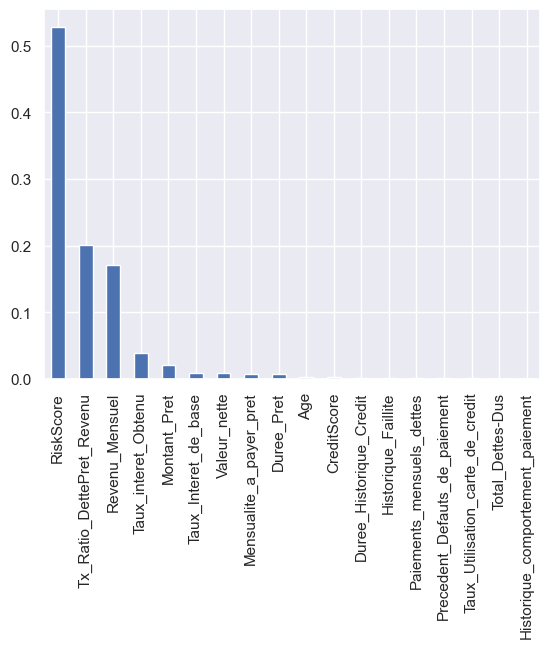

In [72]:
# 
feature_importances = pd.Series(modelfx.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# affichage par ordre decroissant des colonnes importantes
feature_importances.plot.bar();

**INTERPRETATION du Most important features : FORET ALEATOIRE** 

**Pour le modele Foret Aleatoire, on constate qu'une dizaine  de variable ont une influence importante dans l'obtention du credit :**

- **`1-RiskScore`**:
  C'est le 1e element le plus impactant pour l'obtention du credit. Si vous etes dans la tranche haute, votre probabilté d'avoir votre credit est quasi nulle.

- **`2-Tx_Ratio_DettePret_Revenu`**:
  C'est le 2e element  impactant  du credit. Si votre ratio est au dessus de la tranche "Rat_DR_30%" (plus de 30%) , cela reduit fortement votre probabilité pour l'obtention du credit.
 
- **`3-Revenu_Mensuel`**: 
  C'est le 3e element  impactant pour l'obtention du credit. Si vous etes dans la tranche haute, votre probabilté d'avoir votre credit est meilleure, cela ameliore votre probabilité.

- **`4-Taux_interet_Obtenu`**: 
    C'est le 4eme element impactant pour l'obtention du credit. Si le taux d'interet proposé est elevé, cela baisse votre probabilité d'avoir le credit

- **`5-Montant_Pret`**: 
  C'est le 5e element  impactant  du credit. Si  le montant du pret est elevé, cela baisse votre probabilité pour l'obtention du credit.

- **`6-Taux_interet_de_base`**: 
    C'est le 6eme element impactant pour l'obtention du credit. Si le taux d'interet du marché est elevé, cela baisse votre probabilité d'avoir le credit.

- **`7-Valeur_nette`**:
  C'est le 7e element  impactant pour l'obtention du credit. Si vous etes possedez un capital important et moins de dette, votre probabilté d'avoir votre credit est faible.

- **`8- Mensualite_a_payer_pret`**: 
  C'est le 8e element  impactant  du credit. Si  le montant de la mensualité est elevé, votre probabilté d'avoir votre credit est faible..

- **`9-Duree_Pret`**:
  C'est le 9e element  impactant  du credit. Si  la duree du credit est long, cela baisse votre probabilité pour l'obtention du credit.


#### 7-5 Modification des Features suite au resultat du Most important features de la Foret Aleatoire

In [73]:
# Nouvelle Selection des colonnes
X = df[['RiskScore','Tx_Ratio_DettePret_Revenu','Revenu_Mensuel','Taux_interet_Obtenu','Montant_Pret','Taux_Interet_de_base','Valeur_nette','Mensualite_a_payer_pret','Duree_Pret']]

#### 7-6 Prétraitement des données avec nouvelle colonne X reduites du Foret Aleatoire

In [74]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 7-7 Entrainement du Modele avec nouvelles colonnes

In [75]:
modelfx = RandomForestClassifier(
    n_estimators=100,        # nombre d'arbres
    max_depth=4,            # profondeur max
    random_state=0
)

modelfx.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

#### 7-8. Évaluation du modèle

In [76]:
y_pred = modelfx.predict(X_test)
fx_accuracy = accuracy_score(y_test, y_pred)
fx_precision = precision_score(y_test, y_pred)
fx_recall = recall_score(y_test, y_pred)



print("Accuracy:", fx_accuracy)
print("Precision:", fx_precision)
print("Recall:", fx_recall)

print(f'Précision du modèle en %                       : {fx_accuracy * 100:.2f}%')
print(f'Nombre de prédictions positifs bien effectuées : {fx_precision * 100:.2f}%')
print(f'Nombre de positifs (approuvé) bien prédit      : {fx_recall * 100:.2f}%')

Accuracy: 0.9838628340897629
Precision: 0.9731182795698925
Recall: 0.9586864406779662
Précision du modèle en %                       : 98.39%
Nombre de prédictions positifs bien effectuées : 97.31%
Nombre de positifs (approuvé) bien prédit      : 95.87%


##### Interprétation des resultats :
- La fonction accuracy_score du module sklearn.metrics est utilisée pour calculer la précision du classificateur, qui est la proportion d'instances correctement classées.
- La fonction precision_score est utilisée pour calculer la précision du classificateur, qui est la proportion de vrais positifs (instances positives correctement classées) parmi toutes les instances classées comme positives.
- La fonction recall_score est utilisée pour calculer le rappel du classificateur, qui est la proportion de vrais positifs par rapport à toutes les instances positives réelles. 

#### 7-9. visualisation de l'arbre

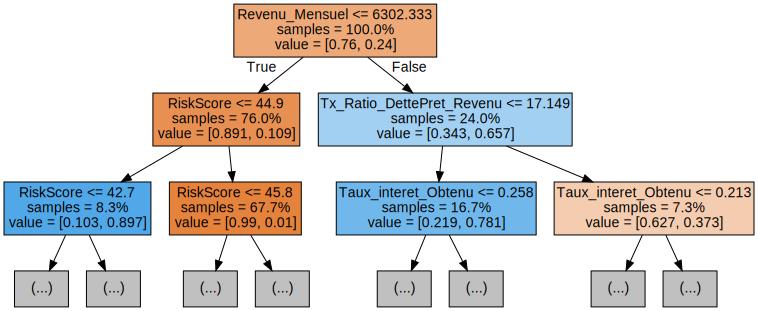

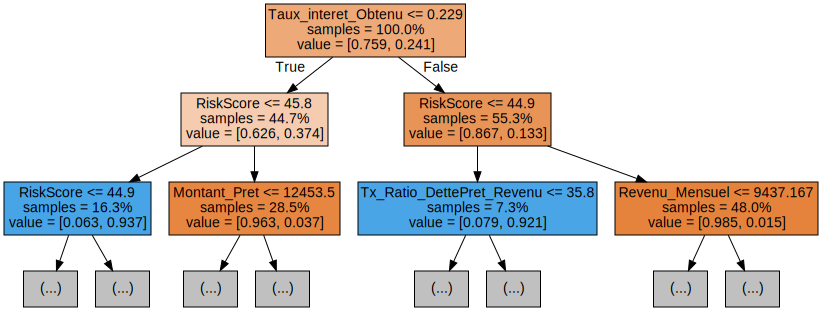

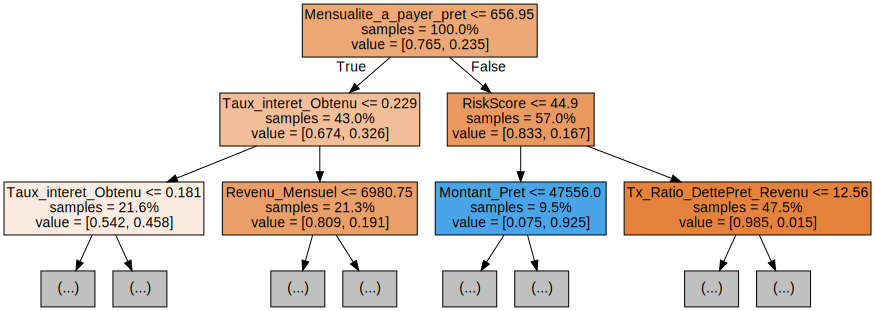

In [77]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = modelfx.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

#### 7-10. Creation et Affichage de la matrice de confusion

Matrice de confusion Foret Aleatoire:
[[2997   25]
 [  39  905]]


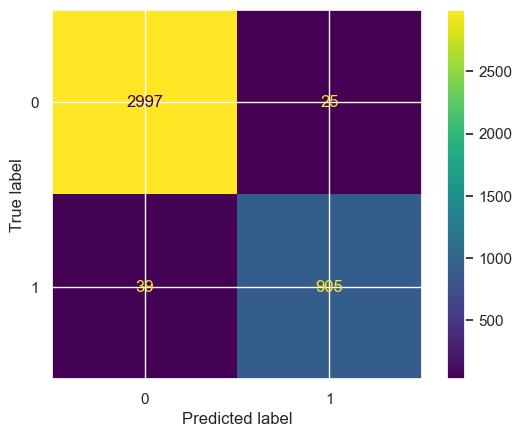

In [78]:
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
print('Matrice de confusion Foret Aleatoire:')
print(conf_matrix)

# cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

##### 7-10-1. Lecture de la matrice de confusion Foret Aleatoire

##### Lecture de la matrice de confusion Foret Aleatoire

- **Vrais négatifs (TN) = 2997 :** Le modèle a correctement prédit 2997 cas où les clients n'ont pas eu le credit. Cela signifie que le modèle a correctement identifié les clients (2997) qui ne sont pas eligibles au credit.
- **Faux positifs (FP) = 25 :** Le modèle a incorrectement prédit 25 cas comme étant des clients ayant eu un dossier accepté alors qu'en réalité, le credit a été refusé. Cela veut dire que le modèle a prédit à tort  ces 25 clients ont eu un credit.
- **Faux négatifs (FN) = 39 :** Le modèle a incorrectement prédit 39 cas comme des clients n'ayant pas eu le credit alors qu'en réalité, leur dossier a été accepté. Autrement dit, le modèle a raté  39 dossiers clients ayant obtenu leur credit.
- **Vrais positifs (TP) = 905 :** Le modèle a correctement prédit 905 demandes de credit ont été acceptés. Cela signifie que pour 905 fois, le modèle a correctement identifié que les clients ayant eu un dossier de credit accepté.

##### Interprétation simple

- Le modèle est bon pour identifier si le dossier client du credit sera acceoté ou non. Avec 905 vrais dossiers acceptés et un taux general de  précision de 98,39%, le modèle est capable de détecter les dossiers qui seront acceptés  avec un taux de 97.31%.
- Le modèle a une marge d'amélioration pour réduire les erreurs : Les 25 faux positifs et 39 faux négatifs montrent que le modèle fait des erreurs.

##### 7-10-2. Predictions : Création de la fonction predict_credit_fa()

In [79]:
def predict_credit_fa(RiskScore,Tx_Ratio_DettePret_Revenu,Revenu_Mensuel,Taux_interet_Obtenu,Montant_Pret,Taux_Interet_de_base,Valeur_nette,Total_Actifs_Detenus,Duree_Pret):
    
    # Créer un tableau numpy avec les valeurs des caractéristiques
    listes_var = np.array([[RiskScore,Tx_Ratio_DettePret_Revenu,Revenu_Mensuel,Taux_interet_Obtenu,Montant_Pret,Taux_Interet_de_base,Valeur_nette,Total_Actifs_Detenus,Duree_Pret]])
    
    # Utiliser le modèle entraîné pour prédire la probabilité d'achat
    proba_credit = modelfx.predict_proba(listes_var)[0][1]  # Prend la probabilité de la classe 1 (credit accordé)
    
    return f"Probabilité credit accepté : {proba_credit * 100:.2f}%"

In [80]:
##### 7-10-3. Exemples de cas avec la  fonction predict_credit_fa()

In [81]:
##### Cas 1 : Exemple d'utilisation de la fonction predict_credit_fa avec un profil refusé
print(predict_credit_fa(49,18.1077197825394,3329,0.227589630355471,13152,0.199652,126928,146111,48))

Probabilité credit accepté : 10.61%


D:\Users\rmama\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [82]:
##### Cas 2 : Exemple d'utilisation de la fonction predict_credit_fa avec un profil approuvé
print(predict_credit_fa(36,7.02098474378087,8605.33333333333,0.175990178775328,9184,0.197184,227019,244305,36))

Probabilité credit accepté : 95.36%


D:\Users\rmama\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<table>
<caption><H3>Table Caption</H3></caption>
  <tr>
    <td><h4>Libellé</h4></td>
    <<td><h4>Régression Logistique</h4></td>
    <td><h4>Forets Aleatoire</h4></td>
  </tr>
  <tr>
    <td><h5>Accuracy</h5></td>
    <td>98,74%</td>
    <td>98,39%</td>
  </tr>
  <tr>
    <td><h5>Precision</h5></td>
    <td>97,86%</td>
    <td>97,31%</td>
  </tr>
  <tr>
    <td><h5>Recall</h5></td>
    <td>96,82%</td>
    <td>95,87%</td>
  </tr>
</table>

**<span style="color: green;">Interpretation</span>** :
- **accuracy** calcule la précision du modèle, c'est-à-dire le pourcentage de prédictions correctes par rapport à l'ensemble de test.
- **precision** est utilisée pour calculer la précision du modèle concernant la proportion de vrais positifs (client ayant le pret approuvé) parmi les predictions des clients positifs. c’est le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs prédit (Vrai Positif + Faux Positif). 
- **recall** est utilisée pour calculer le rappel du classificateur,  c’est le nombre de positifs bien prédit (Vrai Positif) divisé par l’ensemble des positifs (Vrai Positif + Faux Négatif).
- 
- Concernant la **precision generale (accuracy)** des modeles, la **<span style="color: blue;">Régression Logistique (98,74%)</span>** a un taux superieur a celui de la <span style="color: red;">Forets Aleatoire (98,39%)</span>.
- Concernant **l'efficacité a trouver les vrais positifs (precision)**, la **<span style="color: blue;">Régression Logistique (97,86%)</span>** a un taux superieur a celui de la <span style="color: red;">Forets Aleatoire (97,31%)</span>.

**<span style="color: green;">Conclusion</span>** :
- De facon generale, sur cet exemple,  la **<span style="color: blue;">Régression Logistique</span>** a un taux superieur de reussite superieur au modele de la  <span style="color: red;">Forets Aleatoire</span>. On peut dire que le modele de **<span style="color: blue;">Régression Logistique</span>** est plus adapté pour la prediction des credits (approuvé ou pas ) dans la banque.

### 9- Exports données de la base df pour visualisation

In [83]:
df.to_csv(r"D:\Personnelles\documents Roger\Roger\FORMATION DATA ANALYST - AOUT 2025\Projet Final\Loan_rm.csv", index=False)